In [40]:
excel_file_path = 'EDE20251021.csv'
df_excel = pd.read_csv(excel_file_path, encoding='gbk')
display(df_excel.head())

,证券代码↑,证券简称,首发上市日期,资产总计\n[报告期] 2014年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2015年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2016年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2020年报\n[报表类型] 合并报表\n[单位] 元,...,每股收益EPS-基本\n[报告期] 2020年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2021年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2022年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2023年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2024年报\n[币种] 原始币种\n[单位] 元,所属申万行业名称(2014)\n[行业级别] 一级行业,所属申万行业名称(2014)\n[行业级别] 二级行业,所属申万行业名称(2014)\n[行业级别] 三级行业,所属申万行业代码(2014)\n[交易日期] 最新收盘日\n[行业级别] 一级行业,所属申万行业代码(2014)\n[交易日期] 最新收盘日\n[行业级别] 二级行业
0,000001.SZ,平安银行,1991-04-03,"2,186,459,000,000.0000","2,507,149,000,000.0000","2,953,434,000,000.0000","3,248,474,000,000.0000","3,418,592,000,000.0000","3,939,070,000,000.0000","4,468,514,000,000.0000",...,1.4000,1.7300,2.2000,2.2500,2.1500,银行,银行Ⅱ,银行Ⅲ,1.000013e+15,6.119020e+15
1,000002.SZ,万科A,1991-01-29,"508,408,755,415.6500","611,295,567,689.2900","830,674,213,924.1400","1,165,346,917,804.5500","1,528,579,356,474.8100","1,729,929,450,401.2300","1,869,177,094,005.5500",...,3.6200,1.9400,1.9500,1.0300,-4.1700,房地产,房地产开发Ⅱ,房地产开发Ⅲ,6.118000e+15,6.118010e+15
2,000006.SZ,深振业A,1992-04-27,"11,753,217,519.1900","12,703,504,209.2600","13,170,385,529.9600","13,139,931,309.2500","13,536,728,184.7900","15,745,320,850.6500","15,434,760,023.2800",...,0.6405,0.4013,0.3108,-0.5946,-1.1618,房地产,房地产开发Ⅱ,房地产开发Ⅲ,6.118000e+15,6.118010e+15
3,000007.SZ,全新好,1992-04-13,"680,925,246.9600","480,364,514.3300","514,367,695.0800","442,675,592.9600","385,709,995.4700","533,693,420.8900","364,394,022.5500",...,-0.3548,0.1200,-0.0155,0.1038,0.1600,商业贸易,商业物业经营,一般物业经营,6.120000e+15,6.120010e+15
4,000008.SZ,神州高铁,1992-05-07,"674,028,043.8000","3,589,354,694.5200","8,192,656,625.8300","10,678,315,229.7000","10,466,364,830.0200","12,044,543,142.9600","12,828,310,640.7300",...,-0.3300,-0.5500,-0.3100,-0.3100,-0.2000,机械设备,运输设备Ⅱ,铁路设备,6.107000e+15,1.000013e+15


In [41]:
import numpy as np
import pandas as pd
import re

def extract_financial_data(df, metric_keyword):
    metric_cols = [col for col in df.columns if metric_keyword in col]
    if not metric_cols:
        print(f"Warning: No columns found for metric: {metric_keyword}")
        return pd.DataFrame()

    report_dates = [re.search(r'\[报告期\]\s*(\d{4})年报', col) for col in metric_cols]
    report_dates = [pd.to_datetime(m.group(1) + '-12-31') if m else None for m in report_dates]

    metric_df = df[['证券代码↑']].copy()
    metric_df.set_index('证券代码↑', inplace=True)

    for i, col in enumerate(metric_cols):
        if report_dates[i] is not None:
            # 关键：多处理掉中文逗号和百分号
            cleaned_data = (df[col].astype(str)
                                   .str.replace(',', '', regex=False)
                                   .str.replace('，', '', regex=False)
                                   .str.replace('%', '', regex=False)
                                   .str.replace('％', '', regex=False)
                                   .str.strip())
            cleaned_data = cleaned_data.replace({'--': np.nan, '—': np.nan, '－': np.nan, '': np.nan})
            cleaned_data.index = df['证券代码↑']   # 与左侧索引对齐
            metric_df[report_dates[i]] = pd.to_numeric(cleaned_data, errors='coerce')

    metric_df = metric_df.T
    metric_df.index.name = 'report_date'
    metric_df.columns.name = 'security_code'
    return metric_df

# --- 你的原有提取 ---
total_assets_q = extract_financial_data(df_excel, '资产总计')
cash_eq_q      = extract_financial_data(df_excel, '现金及现金等价物')
total_liab_q   = extract_financial_data(df_excel, '负债合计')
da_q           = extract_financial_data(df_excel, '折旧与摊销')
net_income_q   = extract_financial_data(df_excel, '净利润')
cfo_q          = extract_financial_data(df_excel, '经营活动产生的现金流量净额')
cfi_q          = extract_financial_data(df_excel, '投资活动产生的现金流量净额')

# --- 新增：提取“有息负债率”，转为小数，并计算“有息负债/带息债务” ---
interest_bearing_ratio_q = extract_financial_data(df_excel, '有息负债率')

# 把百分数口径统一成小数口径（>1 视为百分数）
if not interest_bearing_ratio_q.empty:
    interest_bearing_ratio_q = interest_bearing_ratio_q.mask(
        interest_bearing_ratio_q > 1, interest_bearing_ratio_q / 100.0
    )

    # 对齐时间与股票维度后相乘更稳妥
    assets_aligned, ratio_aligned = total_assets_q.align(interest_bearing_ratio_q, join='inner')
    interest_bearing_debt_q = assets_aligned * ratio_aligned
else:
    interest_bearing_debt_q = pd.DataFrame()  # 或者设为 None，看你下游函数如何处理

# 验证
print("Total Assets (Quarterly):")
display(total_assets_q.head())
print("\nCash Equivalents (Quarterly):")
display(cash_eq_q.head())
print("\nTotal Liabilities (Quarterly):")
display(total_liab_q.head())
print("\nInterest Bearing Debt (Quarterly):")
display(interest_bearing_debt_q.head())
print("\nDepreciation and Amortization (Quarterly):")
display(da_q.head())
print("\nNet Income (Quarterly):")
display(net_income_q.head())
print("\nCash Flow from Operations (Quarterly):")
display(cfo_q.head())
print("\nCash Flow from Investing (Quarterly):")
display(cfi_q.head())

Total Assets (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,2.186459e+12,5.084088e+11,1.175322e+10,6.809252e+08,6.740280e+08,1.472550e+10,8.042184e+08,3.883288e+09,1.511681e+10,2.236734e+09,...,9.019164e+07,6.250638e+07,71538637.11,3.101878e+08,NaN,6.525695e+07,7.001079e+08,1.337983e+08,NaN,NaN
2015-12-31,2.507149e+12,6.112956e+11,1.270350e+10,4.803645e+08,3.589355e+09,1.811393e+10,5.162183e+09,4.379763e+09,1.548960e+10,2.170515e+09,...,1.248295e+08,1.100570e+08,78848121.22,3.605513e+08,2.314101e+08,1.072444e+08,8.261811e+08,1.340434e+08,NaN,NaN
2016-12-31,2.953434e+12,8.306742e+11,1.317039e+10,5.143677e+08,8.192657e+09,2.162293e+10,4.853288e+09,6.654356e+09,1.714682e+10,1.873814e+09,...,9.512080e+07,1.139753e+08,79196407.65,3.892854e+08,2.293868e+08,2.370314e+08,6.185183e+08,1.747784e+08,NaN,NaN
2017-12-31,3.248474e+12,1.165347e+12,1.313993e+10,4.426756e+08,1.067832e+10,2.710946e+10,3.105153e+09,5.393332e+09,1.953500e+10,1.528277e+09,...,1.186524e+08,1.658176e+08,84117094.66,4.552825e+08,2.467649e+08,2.592814e+08,1.127967e+09,2.675815e+08,NaN,NaN
2018-12-31,3.418592e+12,1.528579e+12,1.353673e+10,3.857100e+08,1.046636e+10,2.984980e+10,3.273278e+09,5.820202e+09,1.911423e+10,1.917249e+09,...,1.327822e+08,2.562276e+08,95709742.34,4.532482e+08,2.824191e+08,3.276668e+08,9.243321e+08,2.762977e+08,NaN,NaN



Cash Equivalents (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,3.062980e+11,6.165332e+10,1.256115e+09,7.445840e+07,1.826889e+08,1.912866e+09,3.758837e+08,8.089634e+08,1.568383e+08,2.195524e+08,...,2236670.35,24713162.12,5054328.30,9051927.16,NaN,12547313.89,7459322.66,1.055305e+07,NaN,NaN
2015-12-31,2.917150e+11,5.174762e+10,1.732717e+09,2.186363e+08,4.146510e+08,3.629442e+09,1.095514e+09,9.333378e+08,5.747449e+08,9.925534e+07,...,6705007.97,17561576.31,7550837.97,24620558.62,7162148.81,12638430.94,38221111.62,9.121892e+07,NaN,NaN
2016-12-31,4.781400e+11,7.949002e+10,2.703758e+09,5.840157e+07,1.062268e+09,1.831729e+09,1.340652e+08,2.857353e+09,5.845670e+08,2.319512e+08,...,2975238.10,5359338.71,10026771.33,48246735.91,5636705.18,85054731.66,28104535.63,7.391524e+07,NaN,NaN
2017-12-31,4.404200e+11,1.643260e+11,2.941952e+09,8.843627e+06,9.529662e+08,3.717561e+09,1.666961e+08,2.464627e+09,2.459753e+09,1.230082e+08,...,2728222.28,13582264.46,14635951.48,73225748.88,7724266.29,41705249.03,78308017.72,8.339251e+07,NaN,NaN
2018-12-31,3.636260e+11,1.756682e+11,3.590293e+09,6.618213e+06,1.009699e+09,4.559504e+09,5.933913e+07,3.375715e+09,2.225127e+09,1.542299e+08,...,12106131.08,91993911.83,5432953.57,51359984.33,7591215.39,36846289.12,79735345.61,1.179170e+08,NaN,NaN



Total Liabilities (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,2.055510e+12,3.925151e+11,7.538752e+09,3.229590e+08,7.567728e+07,9.261367e+09,2.526279e+08,1.808183e+09,6.599760e+09,1.513377e+09,...,68887332.18,3407602.31,29191409.65,1.572626e+08,NaN,42584078.29,6.511758e+08,3.949579e+07,NaN,NaN
2015-12-31,2.345649e+12,4.749860e+11,8.208379e+09,1.075284e+08,6.812927e+08,1.156035e+10,2.991881e+09,2.278995e+09,7.840709e+09,1.397578e+09,...,80818627.54,652289.54,41552526.71,1.776155e+08,1.287920e+08,43158555.97,6.563035e+08,3.307388e+07,NaN,NaN
2016-12-31,2.751263e+12,6.689976e+11,8.040510e+09,7.713564e+07,2.020171e+09,1.348819e+10,2.643687e+09,4.243059e+09,9.017625e+09,1.079228e+09,...,45025743.76,5178159.65,29528450.03,1.767372e+08,1.016575e+08,45157978.66,4.249902e+08,6.188420e+07,NaN,NaN
2017-12-31,3.026420e+12,9.786730e+11,7.432572e+09,5.224851e+07,3.491262e+09,1.716356e+10,1.925555e+09,2.470776e+09,1.075538e+10,7.281273e+08,...,42115443.63,43060359.21,30489928.10,1.699760e+08,1.006331e+08,35709288.72,8.397038e+08,1.416002e+08,NaN,NaN
2018-12-31,3.178550e+12,1.292959e+12,7.150591e+09,1.914831e+08,3.061513e+09,1.939925e+10,2.682468e+09,2.479003e+09,9.664802e+09,9.669943e+08,...,45127590.39,30247661.45,34207196.04,1.588363e+08,1.455023e+08,73343428.47,4.876265e+08,1.389716e+08,NaN,NaN



Interest Bearing Debt (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,1.980947e+12,6.898141e+10,3.495995e+09,4.000027e+07,0.000000e+00,5.815569e+09,5.400005e+07,2.826141e+08,4.596402e+09,9.800005e+08,...,2.226002e+07,2.949989e+06,0.000000e+00,2.800003e+07,NaN,0.000000e+00,1.149997e+08,0.000000e+00,NaN,NaN
2015-12-31,2.281734e+12,7.949104e+10,5.103048e+09,0.000000e+00,1.087108e+08,7.845416e+09,1.855898e+09,2.740812e+08,5.883833e+09,8.700010e+08,...,1.975003e+07,0.000000e+00,0.000000e+00,4.300007e+07,3.866006e+07,1.200000e+07,1.100002e+08,0.000000e+00,NaN,NaN
2016-12-31,2.671287e+12,1.288642e+11,4.202894e+09,0.000000e+00,3.842929e+08,9.171623e+09,1.506795e+09,0.000000e+00,6.485869e+09,6.200002e+08,...,2.999996e+07,4.999983e+06,0.000000e+00,6.029992e+07,1.769994e+07,1.000012e+07,1.763229e+08,0.000000e+00,NaN,NaN
2017-12-31,2.941539e+12,1.906240e+11,3.706065e+09,0.000000e+00,1.103219e+09,1.124446e+10,7.981237e+08,0.000000e+00,6.163020e+09,1.149998e+08,...,2.020900e+07,2.499999e+07,4.000020e+06,3.699990e+07,2.297356e+07,0.000000e+00,1.903162e+08,9.700098e+06,NaN,NaN
2018-12-31,3.106700e+12,2.612082e+11,3.046116e+09,0.000000e+00,1.081709e+09,1.085458e+10,2.977178e+08,1.001075e+08,6.057836e+09,8.999950e+07,...,3.545284e+06,5.000026e+06,7.000019e+06,4.099993e+07,3.399987e+07,2.000078e+08,1.644110e+08,1.011415e+07,NaN,NaN



Depreciation and Amortization (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,1.597000e+09,5.489050e+08,33720585.63,13167897.22,42007980.82,1.836831e+08,6999080.35,41381958.55,7.293641e+08,10571675.75,...,2261693.54,708924.57,1923907.25,5792955.25,NaN,1516923.45,32381860.33,558659.60,NaN,NaN
2015-12-31,1.777000e+09,7.158060e+08,34071351.63,4481875.68,60143670.16,2.208592e+08,9163199.01,39474798.69,8.182465e+08,9499259.38,...,2762447.86,884964.61,2095749.52,7683550.29,6934416.81,1783489.89,26238626.68,1032113.28,NaN,NaN
2016-12-31,1.940000e+09,1.148632e+09,40149431.09,4997555.51,61993857.42,2.944270e+08,16724793.18,41916711.86,9.171527e+08,9887589.02,...,0.00,1020958.88,0.00,8478256.77,9191189.89,2650644.73,0.00,1053960.08,NaN,NaN
2017-12-31,2.176000e+09,1.929038e+09,38137505.99,4821977.38,56903312.57,4.333362e+08,19555138.77,45653783.38,1.002432e+09,9982965.75,...,4048181.23,1370579.89,2206600.75,9584717.73,9345619.80,5631309.39,39929248.89,3453608.91,NaN,NaN
2018-12-31,2.465000e+09,2.921936e+09,40823599.41,5256344.20,68623043.00,5.005633e+08,8999462.06,28356746.32,1.018151e+09,9554693.44,...,4657439.06,1349661.22,3203146.37,10865349.42,11631879.21,8417237.91,44412360.82,6179630.76,NaN,NaN



Net Income (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,1.980200e+10,1.574545e+10,5.080307e+08,-3.019390e+07,7.767774e+06,3.033250e+08,-7.455321e+07,4.174987e+08,873653030.0,6.078358e+07,...,2481919.17,4675033.60,5295655.98,26587679.68,NaN,7628408.13,1014696.32,10238713.27,NaN,NaN
2015-12-31,2.186500e+10,1.811941e+10,4.167528e+08,1.399620e+07,1.856715e+08,7.504945e+08,3.344359e+07,1.568200e+08,624753110.0,5.296351e+07,...,2401576.77,4935980.23,3430945.98,33382439.01,32096332.50,16302969.17,53422005.16,6667045.43,NaN,NaN
2016-12-31,2.259900e+10,2.102261e+10,7.785809e+08,7.801902e+07,5.218662e+08,2.333839e+08,3.987713e+07,3.548572e+08,797721576.0,2.859680e+07,...,6084172.97,4492432.82,2919863.11,29290388.92,9607689.70,19334718.23,50430576.04,8112300.61,NaN,NaN
2017-12-31,2.318900e+10,2.805182e+10,8.056364e+08,1.645365e+07,8.737805e+08,1.332038e+08,-1.061427e+09,6.229627e+08,825388312.0,7.630333e+06,...,10819266.61,13960068.03,3959208.94,25605677.29,18708938.64,34585248.40,69724849.58,12482579.70,NaN,NaN
2018-12-31,2.481800e+10,3.377265e+10,8.742433e+08,-1.962121e+08,3.250516e+08,2.137806e+08,-7.315005e+08,5.927239e+08,452965935.0,1.460004e+08,...,13136131.89,18068000.40,9804894.03,22349960.51,19180707.55,43829698.77,5824975.67,15463119.14,NaN,NaN



Cash Flow from Operations (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,2.532100e+10,4.172482e+10,-1.097954e+09,1.259870e+07,6.869805e+07,4.746348e+08,-1.206893e+08,-1.462706e+07,1.406259e+09,-3.219406e+08,...,3808485.38,-555788.63,4670679.98,30680595.51,NaN,-751747.24,6.850546e+07,15390186.51,NaN,NaN
2015-12-31,-1.826000e+09,1.604602e+10,-3.036626e+08,2.373628e+08,-7.246238e+07,1.258639e+07,-3.880260e+08,3.097676e+08,1.092832e+09,3.989439e+07,...,1999968.81,-37204116.36,14511242.28,-7093121.49,7891918.91,8305065.59,-3.706405e+07,-8138362.46,NaN,NaN
2016-12-31,1.098900e+10,3.956613e+10,1.708426e+09,-2.415689e+07,-5.612657e+07,-1.216165e+07,-8.100979e+07,2.252041e+09,2.240852e+09,4.443082e+08,...,-7764551.52,-4782208.55,-6889786.40,-4968392.28,8996994.10,14838912.99,9.111539e+07,17598849.36,NaN,NaN
2017-12-31,-1.187800e+11,8.232283e+10,7.068813e+08,2.266985e+06,-5.295902e+07,3.909072e+08,5.641627e+08,-3.462698e+08,2.463446e+09,4.192232e+08,...,-1622863.28,-10040858.65,847128.82,18620515.88,27623780.29,46771416.85,4.707246e+08,57581102.60,NaN,NaN
2018-12-31,-5.732300e+10,3.361818e+10,1.606682e+09,-6.874171e+06,-5.905694e+08,2.722842e+09,-2.384320e+08,1.123595e+09,2.130378e+09,-1.181201e+08,...,21421274.67,-5910684.87,-6630839.47,5033366.50,23465422.46,71617210.88,-4.734228e+06,32609413.80,NaN,NaN



Cash Flow from Investing (Quarterly):


security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,-5.448300e+10,-3.487372e+09,3.834279e+08,5.705882e+06,-5.940858e+07,-3.418099e+08,8.800132e+06,2.242203e+08,-8.996012e+08,-4.669390e+05,...,-1046115.97,-1749073.67,-2494103.80,-20333283.73,NaN,-377184.04,-4.567531e+07,-12550020.54,NaN,NaN
2015-12-31,-9.622600e+10,-2.094747e+10,-4.060350e+08,1.303802e+07,-1.561779e+08,-8.256598e+07,-6.046200e+08,-3.022719e+07,-5.782186e+08,-2.920583e+06,...,-989138.73,-12326247.06,-30278226.44,-7122417.07,2781279.28,-42971476.31,-5.518753e+06,88804239.91,NaN,NaN
2016-12-31,-1.023430e+11,-4.338905e+10,6.058410e+08,-1.204445e+08,-1.987288e+09,-2.769166e+09,-6.784499e+07,-4.515498e+06,-1.606226e+09,-9.827770e+05,...,-4918130.09,-7312416.55,-508387.48,-7952152.07,-17199341.73,-49661095.61,-1.101246e+08,-39075339.88,NaN,NaN
2017-12-31,-3.613100e+10,-5.161323e+10,5.013182e+08,-5.182492e+07,-6.863194e+08,-9.972517e+07,1.237100e+08,6.434020e+07,-1.220130e+09,-5.575292e+05,...,-3100457.46,-1286740.54,57711.85,-21424296.95,-29082844.97,-79078624.15,-4.415874e+08,-57533324.24,NaN,NaN
2018-12-31,6.138200e+10,-6.736443e+10,1.251500e+08,4.648757e+06,1.056120e+09,-6.476119e+08,-3.138274e+08,-3.716838e+07,-7.788080e+08,1.840048e+08,...,-3507928.61,23345659.83,-3451196.68,-19702575.79,-23199948.53,-63826170.79,-1.029557e+08,6523211.69,NaN,NaN


# Earnings Quality ABS 资产负债表应计项目 ACF 现金流量表应计项目

In [104]:
# ABS：资产负债表应计项 / 总资产
# ACCR_BS = [(TA - Cash) - (TL - InterestDebt)]_t - 上期同口径 - DA
def factor_ABS(total_assets_q, cash_eq_q, total_liab_q, interest_bearing_debt_q, da_q) -> pd.Series:
    na = (total_assets_q - cash_eq_q) - (total_liab_q - interest_bearing_debt_q)
    accr_bs = na.diff() - (da_q if da_q is not None else 0.0)
    return (accr_bs / total_assets_q).replace([np.inf, -np.inf], np.nan)

# ACF：现金流量表应计项 / 总资产
# ACCR_CF = net_income - (cfo + cfi) + da
def factor_ACF(net_income_q, cfo_q, cfi_q, da_q, total_assets_q) -> pd.Series:
    accr_cf = net_income_q - (cfo_q + cfi_q) + (da_q if da_q is not None else 0.0)
    return (accr_cf / total_assets_q).replace([np.inf, -np.inf], np.nan)


In [105]:
abs_factor_q = factor_ABS(total_assets_q, cash_eq_q, total_liab_q, interest_bearing_debt_q, da_q)
display(abs_factor_q.head(30))

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,0.137265,0.065624,0.108398,-0.361788,0.592395,0.065246,0.521449,-0.033499,-0.052737,0.023210,...,0.103868,0.487225,-0.122310,0.060348,NaN,0.480569,0.071347,-0.559751,NaN,NaN
2016-12-31,0.081891,0.055195,-0.096929,0.426996,0.345480,0.203980,0.130823,-0.289958,0.009061,-0.197957,...,0.210930,0.136641,0.124961,0.038039,-0.015322,0.213983,0.161822,0.161200,NaN,NaN
2017-12-31,0.100256,-0.000007,-0.014892,-0.004674,0.167245,0.057723,-0.576738,0.159147,-0.130537,-0.262045,...,0.108298,0.146948,0.013594,0.032715,0.049614,0.229159,0.016486,0.036835,NaN,NaN
2018-12-31,0.075317,0.068866,-0.049520,-0.516531,0.006777,-0.041131,-0.302704,-0.072282,-0.011452,0.043984,...,-0.147470,0.013509,0.176317,0.053185,-0.034302,0.693390,0.082976,-0.104762,NaN,NaN
2019-12-31,0.128844,0.037648,0.155527,-0.044192,0.090758,-0.005373,0.014502,0.191397,-0.052043,0.014629,...,0.233858,0.310512,-0.113281,-0.049346,0.025742,-0.479093,0.020471,-0.088670,NaN,NaN
2020-12-31,0.189940,0.026953,0.114574,-0.431660,0.097470,-0.002648,-0.048199,0.082669,-0.090109,-0.120943,...,0.072392,0.176187,-0.045678,0.019930,0.035850,-0.107407,-0.002392,-0.200840,NaN,NaN
2021-12-31,0.088708,0.045512,0.153399,0.160583,-0.104684,0.094486,0.064135,0.214577,-0.015715,0.101063,...,0.024451,-0.039589,-0.008221,0.070111,0.110830,0.229924,-0.005036,0.046827,NaN,NaN
2022-12-31,0.078567,0.031253,-0.044366,-0.346629,-0.117006,0.118841,0.039348,0.022358,0.065846,-0.016927,...,0.371404,0.156902,-0.027716,0.111063,0.257846,0.206353,0.083938,0.097298,NaN,NaN


In [106]:
acf_factor_q = factor_ACF(net_income_q, cfo_q, cfi_q, da_q, total_assets_q)
display(acf_factor_q.head())

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,0.023125,-0.043160,0.106888,-0.051886,0.060066,0.024052,0.055128,0.064195,0.072526,0.176044,...,0.021967,0.123009,0.070493,0.071032,NaN,0.157443,0.015093,0.059472,NaN,NaN
2015-12-31,0.048539,0.038830,0.091354,-0.482806,0.132184,0.057488,0.200546,-0.019007,0.059936,0.011743,...,0.033271,0.502933,0.270059,0.153325,0.122542,0.491894,0.147962,-0.544351,NaN,NaN
2016-12-31,0.039240,0.031293,-0.113553,0.442520,0.320687,0.153038,0.042334,-0.278126,0.063000,-0.216052,...,0.197295,0.154490,0.130284,0.130211,0.117710,0.239663,0.112268,0.175323,NaN,NaN
2017-12-31,0.055496,-0.000625,-0.027734,0.160012,0.156388,0.010157,-0.557056,0.176245,0.029921,-0.262421,...,0.165111,0.160769,0.062543,0.083452,0.119602,0.279711,0.071382,0.059378,NaN,NaN
2018-12-31,0.006793,0.046083,-0.060337,-0.489306,-0.006867,-0.045591,-0.052010,-0.079954,0.006254,0.046770,...,-0.000902,0.007738,0.241251,0.105647,0.108162,0.135674,0.170856,-0.063301,NaN,NaN


In [107]:
# 假定已有：abs_factor_q、acf_factor_q   # 行=report_date(年末)，列=证券代码

# 1) 对齐时间&股票维度
ABS = abs_factor_q.sort_index()
ACF = acf_factor_q.reindex_like(ABS)

# 2) 截面去极值 + 标准化（逐年）
ABS_z = zscore_cs(ABS.apply(winsorize_by_mad_row, axis=1))
ACF_z = zscore_cs(ACF.apply(winsorize_by_mad_row, axis=1))

# 3) 方向统一：应计越高→质量越差，所以取负号
ABS_q = -ABS_z
ACF_q = -ACF_z

# 4) 等权合成（允许一项缺失时用另一项；两项都缺就 NaN）
num = ABS_q.fillna(0) + ACF_q.fillna(0)
den = ABS_q.notna().astype(int) + ACF_q.notna().astype(int)
EarningsQuality = num.div(den.replace(0, np.nan))

# 5) （可选）对合成结果再做一次截面标准化，便于与其它因子同尺度
EarningsQuality_z = zscore_cs(EarningsQuality.apply(winsorize_by_mad_row, axis=1))


In [108]:
EarningsQuality

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,0.587090,1.185271,-0.168822,1.264016,0.253716,0.578718,0.298279,0.216456,0.141275,-0.792909,...,0.597537,-0.314301,0.159618,0.154754,NaN,-0.625052,0.659575,0.259081,NaN,NaN
2015-12-31,-0.061109,0.177794,-0.152435,3.121620,-1.667027,0.103946,-1.743474,0.686600,0.423373,0.404896,...,0.093383,-2.861895,-0.226008,-0.267120,-0.295535,-2.799003,-0.276286,3.674073,NaN,NaN
2016-12-31,0.165720,0.273389,1.287308,-2.434783,-1.713650,-0.638164,0.014508,2.496568,0.276717,1.986020,...,-0.835852,-0.453026,-0.322558,-0.075752,0.125849,-1.014890,-0.354646,-0.606460,NaN,NaN
2017-12-31,0.131187,0.628420,0.774906,0.019796,-0.446371,0.425444,3.758386,-0.500596,0.874796,2.373466,...,-0.315479,-0.406631,0.345973,0.211649,0.024548,-1.096559,0.303688,0.293306,NaN,NaN
2018-12-31,0.193940,0.057176,0.824529,3.434819,0.448283,0.741618,1.531220,0.968722,0.449570,0.127144,...,0.875288,0.370769,-1.029735,-0.132928,0.112703,-1.809192,-0.478230,0.997655,NaN,NaN
2019-12-31,-0.187755,0.185224,-0.653480,0.461116,-0.306951,0.374930,0.056097,-0.548107,0.537615,0.334168,...,-1.223795,-1.774908,0.809498,0.470849,-0.235561,1.305574,-0.161650,0.680293,NaN,NaN
2020-12-31,-0.183574,0.309228,-0.343895,2.838717,-0.264476,0.327600,0.146772,-0.022282,0.657416,1.065575,...,-0.127428,-0.638446,0.550936,0.087042,-0.104991,0.777963,0.156943,1.530903,NaN,NaN
2021-12-31,0.154746,0.370168,-0.248755,-0.667115,1.332803,0.149114,0.382790,-0.725527,0.331217,0.132810,...,0.396952,0.578959,0.624571,0.120296,-0.140600,-0.850375,0.531380,0.345446,NaN,NaN
2022-12-31,0.272242,0.215786,0.759206,2.936519,1.133103,-0.352734,0.100874,0.238971,-0.307812,0.540804,...,-2.269161,-0.605036,0.547339,-0.722787,-1.609526,-0.541814,-0.177296,-0.409823,NaN,NaN


# Earnings Variability VSAL 营业额的波动性 VERN 盈利的波动性 VFLO 现金流的波动性

In [109]:
# VSAL：营收波动（5年窗口 std）
def factor_VSAL(sales_q: pd.DataFrame, window_years: int = 5, min_years: int | None = None) -> pd.DataFrame:
    """
    VSAL = 过去 window_years 年的营业收入标准差 / 营业收入均值
    sales_q: 行为 report_date（年末），列为证券代码，值为年度营业收入
    """
    if min_years is None:
        min_years = window_years  # 需要满 5 年才给结果；如果想更早出值可改成 3

    df = sales_q.copy()

    # 只保留形如 000001.SZ / 600000.SH / 430000.BJ 的列，去掉 'NaN'、'数据来源：Wind' 等杂列
    code_pat = r'^\d{6}\.(SZ|SH|BJ)$'
    df = df.loc[:, df.columns.astype(str).str.match(code_pat, na=False)]

    # 时间升序，滚动计算
    df = df.sort_index()
    roll = df.rolling(window=window_years, min_periods=min_years)

    mean5 = roll.mean()
    std5  = roll.std(ddof=1)      # 样本标准差，和金融里常用口径一致
    vsal  = (std5 / mean5).replace([np.inf, -np.inf], np.nan)

    return vsal

# VERN：净利润波动（5年窗口 std）
def factor_VERN(net_income_q: pd.DataFrame, window_years: int = 5, min_years: int | None = None) -> pd.Series:
    """
    VERN = 过去 window_years 年的盈利的标准差/年度盈利均值。
    net_income_q: 净利润
    """
    if min_years is None:
        min_years = window_years  # 需要满 5 年才给结果；如果想更早出值可改成 3

    df = net_income_q.copy()

    # 只保留形如 000001.SZ / 600000.SH / 430000.BJ 的列，去掉 'NaN'、'数据来源：Wind' 等杂列
    code_pat = r'^\d{6}\.(SZ|SH|BJ)$'
    df = df.loc[:, df.columns.astype(str).str.match(code_pat, na=False)]

    # 时间升序，滚动计算
    df = df.sort_index()
    roll = df.rolling(window=window_years, min_periods=min_years)

    mean5 = roll.mean()
    std5  = roll.std(ddof=1)      # 样本标准差，和金融里常用口径一致
    vern  = (std5 / mean5).replace([np.inf, -np.inf], np.nan)

    return vern

# VFLO：经营现金流波动（5年窗口 std）
def factor_VFLO(cfo_q: pd.DataFrame, window_years: int = 5, min_years: int | None = None) -> pd.Series:
    """
    VFLO = 过去 window_years 年的度现金流标准差/年度现金流均值。
    cfo_q: 经营活动现金流
    """
    if min_years is None:
        min_years = window_years  # 需要满 5 年才给结果；如果想更早出值可改成 3

    df = cfo_q.copy()

    # 只保留形如 000001.SZ / 600000.SH / 430000.BJ 的列，去掉 'NaN'、'数据来源：Wind' 等杂列
    code_pat = r'^\d{6}\.(SZ|SH|BJ)$'
    df = df.loc[:, df.columns.astype(str).str.match(code_pat, na=False)]

    # 时间升序，滚动计算
    df = df.sort_index()
    roll = df.rolling(window=window_years, min_periods=min_years)

    mean5 = roll.mean()
    std5  = roll.std(ddof=1)      # 样本标准差，和金融里常用口径一致
    vflo  = (std5 / mean5).replace([np.inf, -np.inf], np.nan)

    return vflo
# ETOPF_STD：一致预期EPS分歧（直接用）
def factor_ETOPF_STD(eps_fwd_std_mq) -> pd.Series:
    return eps_fwd_std_mq



sales_q = extract_financial_data(df_excel, '营业收入')
net_income_q = extract_financial_data(df_excel, '净利润')
cfo_q = extract_financial_data(df_excel, '经营活动产生的现金流量净额')
VSAL_factor_q = factor_VSAL(sales_q)
VERN_factor_q = factor_VERN(net_income_q)
VFLO_factor_q = factor_VFLO(cfo_q)


In [110]:
import numpy as np
import pandas as pd

# 如你已在上文定义过这两个函数，可删掉下面重复定义
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

def factor_EVAR(vsal: pd.DataFrame, vern: pd.DataFrame, vflo: pd.DataFrame,
                standardize: bool = True) -> pd.DataFrame:
    # 1) 行/列对齐（只保留公共时间与股票）
    cmn_idx  = vsal.index.intersection(vern.index).intersection(vflo.index)
    cmn_cols = vsal.columns.intersection(vern.columns).intersection(vflo.columns)
    V = vsal.reindex(index=cmn_idx, columns=cmn_cols)
    N = vern.reindex(index=cmn_idx, columns=cmn_cols)
    F = vflo.reindex(index=cmn_idx, columns=cmn_cols)

    # 2) 截面去极值 + 标准化（推荐）
    if standardize:
        V = zscore_cs(V.apply(winsorize_by_mad_row, axis=1))
        N = zscore_cs(N.apply(winsorize_by_mad_row, axis=1))
        F = zscore_cs(F.apply(winsorize_by_mad_row, axis=1))

    # 3) 等权合成（允许部分缺失）
    num = V.fillna(0) + N.fillna(0) + F.fillna(0)
    den = V.notna().astype(int) + N.notna().astype(int) + F.notna().astype(int)
    EV = num.div(den.replace(0, np.nan))

    # 4) （可选）对合成结果再做一次标准化，便于与其它风格同尺度
    if standardize:
        EV = zscore_cs(EV.apply(winsorize_by_mad_row, axis=1))

    EV.index.name = 'report_date'
    EV.columns.name = 'security_code'
    return EV

# —— 计算 ——
EVAR = factor_EVAR(VSAL_factor_q, VERN_factor_q, VFLO_factor_q)

In [151]:
EarningsVariability=EVAR
EarningsVariability

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920964.BJ,920970.BJ,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,-1.716185,-0.294188,0.195048,0.746012,-0.073769,0.856914,-1.805313,0.600120,-0.594046,1.153776,...,-0.478940,NaN,1.319228,1.296876,0.608265,-0.351995,NaN,1.287858,0.924633,0.173495
2019-12-31,-1.483517,-0.302415,-0.272827,0.385635,-0.798171,0.713713,-1.631771,0.557575,-0.731127,0.582670,...,-1.593693,1.175080,1.150590,1.830808,0.755343,-0.347653,-0.231596,0.686806,0.585950,0.272436
2020-12-31,-1.350957,-0.362660,-0.423709,-2.607902,-0.235113,0.310325,-1.596330,0.043767,-0.997042,0.850206,...,-1.716689,0.140682,0.941203,0.692647,0.792335,-0.677345,0.049237,0.097306,0.577547,0.996654
2021-12-31,-1.105159,-0.291352,-1.762218,-0.360276,-0.307287,0.551723,-1.659207,0.730036,-0.604715,1.229213,...,-1.828309,-0.173109,0.895851,1.888964,0.253477,-0.358054,0.566805,-0.251886,1.039934,0.740462
2022-12-31,-1.657143,-0.296418,-1.636273,1.470238,-0.452962,1.036203,-1.104933,0.682383,-0.338839,1.355316,...,0.580967,-0.283853,1.111839,1.210439,0.052977,0.489476,0.166740,0.488668,1.205438,0.567727


# Growth SGRO 销售增长率

In [112]:
def factor_SGRO(sales_annual_df: pd.DataFrame,
                     window_years: int = 5,
                     min_years: int = 5,
                     normalize_by_mean: bool = True) -> pd.DataFrame:
    """
    SGRO(t) = 以 t 结尾的过去 window_years 年“年度销售额”对时间做 OLS 回归的斜率，
              再除以该窗口的销售额均值（可选）。
    输入：行为年末日期，列为证券代码，值为“年度销售额”（或年度每股销售额）。
    返回：与输入同形状的 DataFrame，前几行会是 NaN（不足 5 年）。
    """
    # 只保留规范股票列，去掉“NaN/数据来源：Wind”等杂列
    code_pat = r'^\d{6}\.(SZ|SH|BJ)$'
    df = sales_annual_df.loc[:, sales_annual_df.columns.astype(str).str.match(code_pat, na=False)]
    df = df.sort_index()

    def _slope_norm_window(arr: np.ndarray) -> float:
        # arr 含有 NaN，用有效值计算
        y = arr[np.isfinite(arr)]
        n = y.size
        if n < min_years:
            return np.nan
        x = np.arange(n, dtype=float)
        xm, ym = x.mean(), y.mean()
        denom = ((x - xm) ** 2).sum()
        if denom == 0:
            return np.nan
        slope = ((x - xm) * (y - ym)).sum() / denom
        if normalize_by_mean:
            return np.nan if ym == 0 or not np.isfinite(ym) else slope / ym
        return slope

    # 对每列做 5 年滚动回归
    out = df.rolling(window=window_years, min_periods=min_years).apply(_slope_norm_window, raw=True)
    out.index.name = 'report_date'
    out.columns.name = 'security_code'
    return out

SGRO_factor_q = factor_SGRO(sales_q)


In [113]:
# 假定你已经有 SGRO_factor_q（行=report_date 年末，列=security_code）

# 1) 逐截面去极值 + 标准化
SGRO_w  = SGRO_factor_q.apply(winsorize_by_mad_row, axis=1)  # 5×MAD，函数你前面已定义
GROWTH_q = zscore_cs(SGRO_w)                                 # 跨截面 z-score
GROWTH_q.index.name = 'report_date'
GROWTH_q.columns.name = 'security_code'


In [114]:
GROWTH=GROWTH_q
GROWTH

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920964.BJ,920970.BJ,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,-0.333676,0.054250,-1.033486,-3.850543,1.199066,0.649426,-0.931252,0.608904,-0.194025,-1.241436,...,0.655620,NaN,-0.184381,3.010172,-0.605790,-0.676640,NaN,1.904879,0.011718,0.390531
2019-12-31,-0.428185,0.042794,-1.150489,-2.472006,0.403342,0.619290,-0.189825,0.772822,-0.443878,-1.318696,...,-0.081587,1.474545,-0.878110,3.482038,-0.775813,-0.979843,0.114798,1.401603,-0.166061,0.674184
2020-12-31,-0.134315,0.235479,-0.830628,-0.568763,-0.535307,0.136835,0.339509,0.296448,-0.616357,-1.747705,...,-0.201060,0.689573,-0.029983,2.570666,-0.519888,-0.770890,0.565882,0.739633,0.287829,1.322829
2021-12-31,0.003307,0.206759,-0.617584,1.802390,-0.988166,0.317670,0.819771,0.022732,-0.445573,-0.419485,...,-0.176671,0.488102,0.309875,0.927816,-0.200045,-0.238252,0.977723,0.436457,0.921766,1.142054
2022-12-31,-0.054128,0.055208,-0.363219,2.190151,-1.385960,1.007553,-0.494053,-0.313647,-0.068670,0.534718,...,-0.032699,0.206204,0.199432,-0.246812,0.033726,0.440576,0.495017,1.044992,1.745449,0.583112


# Investment Quality CXGRO 资本支出增长率

In [116]:
# CXGRO：资本开支增长（同比）
def factor_CXGRO(capex_annual_df: pd.DataFrame,
                      window_years: int = 3,
                      min_years: int = 3,
                      take_negative: bool = True) -> pd.DataFrame:
    """
    CXGRO(t) = 以 t 结尾的最近 window_years 年 CAPEX 对时间做 OLS 的斜率 / 窗口均值，
               然后取相反数（可选）。
    输入: 行=年末日期(YYYY-12-31)，列=证券代码，值=年度 CAPEX（金额口径）
    输出: 与输入同形状的 DataFrame
    """
    # 仅保留规范证券代码列，去掉'数据来源：Wind'之类杂列
    code_pat = r'^\d{6}\.(SZ|SH|BJ)$'
    df = capex_annual_df.loc[:, capex_annual_df.columns.astype(str).str.match(code_pat, na=False)].sort_index()

    def _slope_over_mean_window(arr: np.ndarray) -> float:
        y = arr[np.isfinite(arr)]
        n = y.size
        if n < min_years:
            return np.nan
        x = np.arange(n, dtype=float)
        xm, ym = x.mean(), y.mean()
        denom = ((x - xm) ** 2).sum()
        if denom == 0 or ym == 0 or not np.isfinite(ym):
            return np.nan
        slope = ((x - xm) * (y - ym)).sum() / denom
        val = slope / ym
        return -val if take_negative else val

    out = df.rolling(window=window_years, min_periods=min_years).apply(_slope_over_mean_window, raw=True)
    out.index.name = 'report_date'
    out.columns.name = 'security_code'
    return out
    
capex_q = extract_financial_data(df_excel, '资本性支出')
CXGRO_factor_q = factor_CXGRO(capex_q)


In [117]:
CXGRO_w  = CXGRO_factor_q.apply(winsorize_by_mad_row, axis=1)  # 5×MAD，函数你前面已定义
InvestmentQuality = zscore_cs(CXGRO_w)                                 # 跨截面 z-score
InvestmentQuality.index.name = 'report_date'
InvestmentQuality.columns.name = 'security_code'

In [118]:
InvestmentQuality

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920964.BJ,920970.BJ,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,0.438902,-0.023621,1.719319,0.488454,-0.955920,-0.232811,-1.731752,0.599664,0.569528,-0.051543,...,-0.765237,NaN,-1.583528,-0.633281,0.344979,0.992684,NaN,-1.335286,-1.045539,-1.735009
2017-12-31,0.540663,0.156681,1.244887,-1.755861,0.818309,0.240015,0.400532,2.593198,-0.021700,2.456642,...,1.272789,-0.618483,-0.563123,1.936272,3.259528,-0.962903,0.634067,0.644508,0.109672,-0.498854
2018-12-31,-0.218908,-0.801827,-2.352560,0.258584,-0.423333,0.125948,3.230771,-1.223245,0.971270,-0.667919,...,1.270360,-0.060395,0.765998,1.424464,-1.671814,-0.260983,-0.285487,-0.244530,0.402554,1.122032
2019-12-31,0.009795,-0.649137,-0.820091,1.632139,-0.873406,0.496577,-0.779114,-2.078677,0.850668,0.464832,...,2.226899,-0.809602,0.562096,0.230727,-1.068783,0.585522,-0.121311,-0.506945,-1.072822,1.244393
2020-12-31,0.484380,-0.027901,1.304846,-0.279114,-0.426666,0.332291,0.919966,-0.578937,-0.328933,-1.322928,...,1.961018,0.685884,0.560729,-2.443942,1.328692,0.057348,-0.150519,1.058715,0.435404,1.038804
2021-12-31,-0.328398,-0.079444,1.368778,-2.292467,-0.486440,-0.745516,2.825116,1.306363,-0.579775,-1.900141,...,-2.206789,1.405482,0.081774,-1.338352,1.515098,0.074369,-0.367154,-0.160476,-0.273514,0.068656
2022-12-31,0.326780,-0.290006,-1.092053,-0.452615,0.438475,-0.969821,0.216278,1.488904,-0.864722,NaN,...,-0.998477,-1.703317,-2.414666,0.149463,-1.891169,-0.214959,-0.992250,-0.663249,-0.413174,-0.432328


# Leverage DTOA 资产负债比 BLEV 账面杠杆率

In [120]:
# DTOA：资产负债率
def factor_DTOA(total_liab_q, total_assets_q) -> pd.Series:
    return (total_liab_q / total_assets_q).replace([np.inf, -np.inf], np.nan)

# BLEV：账面杠杆
def factor_BLEV(book_equity_q, long_debt_q) -> pd.Series:
    return ((book_equity_q + long_debt_q) / book_equity_q).replace([np.inf, -np.inf], np.nan)

total_liab_q = extract_financial_data(df_excel, '负债合计')
total_assets_q = extract_financial_data(df_excel, '资产总计')
book_equity_q = extract_financial_data(df_excel, '股东权益合计')

# 1) 提取长期负债“占比”
long_debt_ratio_q = extract_financial_data(df_excel, '长期负债占比')

# 2) 统一为小数口径：30 或 30.0 代表 30% → 0.30
long_debt_ratio_q = long_debt_ratio_q.mask(long_debt_ratio_q > 1, long_debt_ratio_q / 100.0)

# 3A) —— 常见定义：分母=负债合计
liab_aln, ratio_aln = total_liab_q.align(long_debt_ratio_q, join='inner')
long_debt_q = liab_aln * ratio_aln   # ← 这就是“长期负债（金额）”

DTOA_factor_q = factor_DTOA(total_liab_q, total_assets_q)
BLEV_factor_q = factor_BLEV(book_equity_q, long_debt_q)

In [121]:
# 已有：DTOA_factor_q, BLEV_factor_q （行=report_date，列=security_code）

def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

def factor_LEVERAGE(dtoa: pd.DataFrame, blev: pd.DataFrame,
                    standardize: bool = True) -> pd.DataFrame:
    # 1) 行/列对齐
    cmn_idx  = dtoa.index.intersection(blev.index)
    cmn_cols = dtoa.columns.intersection(blev.columns)
    D = dtoa.reindex(index=cmn_idx, columns=cmn_cols)
    B = blev.reindex(index=cmn_idx, columns=cmn_cols)

    # 2) 截面去极值 + 标准化（逐年）
    if standardize:
        D = zscore_cs(D.apply(winsorize_by_mad_row, axis=1))
        B = zscore_cs(B.apply(winsorize_by_mad_row, axis=1))

    # 3) 等权合成（允许缺一项时用有效项；两项都缺则 NaN）
    num = D.fillna(0) + B.fillna(0)
    den = D.notna().astype(int) + B.notna().astype(int)
    LEV = num.div(den.replace(0, np.nan))

    # 4) （可选）对合成结果再标准化，便于与其它风格同尺度
    if standardize:
        LEV = zscore_cs(LEV.apply(winsorize_by_mad_row, axis=1))

    LEV.index.name = 'report_date'
    LEV.columns.name = 'security_code'
    return LEV

# 计算
LEVERAGE = factor_LEVERAGE(DTOA_factor_q, BLEV_factor_q)

In [122]:
LEVERAGE

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,2.050117,1.600941,1.251822,-0.505700,-1.473252,1.218451,-0.057404,0.227083,-0.214763,1.345848,...,0.268021,-1.627626,-0.682746,-0.418311,NaN,1.281595,0.712536,-0.984388,NaN,NaN
2015-12-31,2.127270,1.698901,1.345374,-1.093801,-0.708671,1.323901,1.165526,0.271498,0.967279,1.339273,...,0.050501,-1.682507,-0.274858,-0.367714,0.203796,0.027230,0.447482,-1.031957,NaN,NaN
2016-12-31,2.170036,1.828173,1.300214,-1.242671,-0.891293,1.336226,1.122000,0.078593,1.071026,1.206616,...,-0.366502,-1.525876,-0.638795,-0.418925,-0.448276,-0.495826,0.212634,-0.689671,NaN,NaN
2017-12-31,2.184957,1.933463,1.182616,-1.333053,-0.760891,1.367402,0.701692,-0.401666,1.141322,0.673727,...,-0.684210,-0.945104,-0.663610,-0.633836,-0.539440,-1.075270,1.291827,-0.207033,NaN,NaN
2018-12-31,2.206333,1.976787,1.108075,-0.317369,-0.622597,1.440821,1.403130,-0.271767,1.046255,0.249817,...,-0.627875,-1.352300,0.640842,-0.716698,-0.266068,-0.968897,0.108491,-0.299496,NaN,NaN
2019-12-31,2.205917,1.996824,1.184468,-0.016918,-0.416416,1.458752,0.589303,1.597892,0.602205,0.045438,...,0.492054,-0.816673,0.854081,-0.649074,-0.106487,-0.198759,0.640464,-0.267379,NaN,NaN
2020-12-31,2.217303,1.929960,1.058089,0.593882,1.025411,1.308331,0.473140,1.596666,0.824743,0.864281,...,-0.105885,-0.726997,0.440164,-0.602566,-0.111541,-0.105088,1.783150,0.151688,NaN,NaN
2021-12-31,2.245441,1.912727,1.520333,0.393314,1.290996,1.314592,1.521435,1.618437,0.844432,0.785878,...,-0.327635,-0.708649,-0.344055,-0.560751,-0.596936,0.277932,1.295682,-0.153954,NaN,NaN
2022-12-31,2.290072,1.900508,1.664001,0.327223,0.680568,1.560590,0.612371,1.763467,1.152101,0.015825,...,-1.263687,-0.520358,-0.554946,-0.313377,-0.601230,0.221119,1.629230,-0.866669,NaN,NaN


# Profitability ATO 资产周转率 GP 资产毛利率 GPM 销售毛利率 ROA 资产回报率

In [124]:
def factor_ATO(sales_q, total_assets_q) -> pd.Series:
    return ((sales_q) / total_assets_q).replace([np.inf, -np.inf], np.nan)

def factor_GP(sales_q, cogs_q, total_assets_q) -> pd.Series:
    return (((sales_q) - (cogs_q)) / total_assets_q).replace([np.inf, -np.inf], np.nan)

def factor_GPM(sales_q, cogs_q) -> pd.Series:
    return ((sales_q - cogs_q) / sales_q).replace([np.inf, -np.inf], np.nan)

def factor_ROA(net_income_q, total_assets_q) -> pd.Series:
    return ((net_income_q) / total_assets_q).replace([np.inf, -np.inf], np.nan)

cogs_q = extract_financial_data(df_excel, '营业成本')
ATO_factor_q = factor_ATO(sales_q, total_assets_q)
GP_factor_q = factor_GP(sales_q, cogs_q, total_assets_q)
GPM_factor_q = factor_GPM(sales_q, cogs_q)
ROA_factor_q = factor_ROA(net_income_q, total_assets_q)

In [125]:
# 已有：ATO_factor_q, GP_factor_q, GPM_factor_q, ROA_factor_q
# 若前面已定义 winsorize_by_mad_row / zscore_cs，可删掉这两段

def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

def factor_PROFITABILITY(ATO, GP, GPM, ROA, standardize=True):
    # 1) 行/列对齐
    cmn_idx  = ATO.index.intersection(GP.index).intersection(GPM.index).intersection(ROA.index)
    cmn_cols = ATO.columns.intersection(GP.columns).intersection(GPM.columns).intersection(ROA.columns)
    A = ATO.reindex(index=cmn_idx, columns=cmn_cols)
    G = GP .reindex(index=cmn_idx, columns=cmn_cols)
    GM= GPM.reindex(index=cmn_idx, columns=cmn_cols)
    R = ROA.reindex(index=cmn_idx, columns=cmn_cols)

    # 2) 截面去极值 + 标准化（逐年）
    if standardize:
        A = zscore_cs(A.apply(winsorize_by_mad_row, axis=1))
        G = zscore_cs(G.apply(winsorize_by_mad_row, axis=1))
        GM= zscore_cs(GM.apply(winsorize_by_mad_row, axis=1))
        R = zscore_cs(R.apply(winsorize_by_mad_row, axis=1))

    # 3) 等权合成（允许部分缺失）
    num = A.fillna(0) + G.fillna(0) + GM.fillna(0) + R.fillna(0)
    den = A.notna().astype(int) + G.notna().astype(int) + GM.notna().astype(int) + R.notna().astype(int)
    PROF = num.div(den.replace(0, np.nan))

    # 4) （可选）对合成结果再做一次截面标准化，便于与其它风格同尺度
    if standardize:
        PROF = zscore_cs(PROF.apply(winsorize_by_mad_row, axis=1))

    PROF.index.name = 'report_date'
    PROF.columns.name = 'security_code'
    return PROF

# 计算
PROFITABILITY = factor_PROFITABILITY(ATO_factor_q, GP_factor_q, GPM_factor_q, ROA_factor_q)

In [126]:
PROFITABILITY

security_code,000001.SZ,000002.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,000012.SZ,000014.SZ,...,920971.BJ,920974.BJ,920976.BJ,920978.BJ,920981.BJ,920982.BJ,920985.BJ,920992.BJ,NaN,数据来源：Wind
report_date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,-1.493845,-0.764082,-0.675913,-0.575992,-0.211372,-0.753547,-1.659528,0.397204,-0.552204,-0.323005,...,-0.605171,-0.047838,1.499986,0.311069,NaN,0.780255,-0.659518,0.272830,NaN,NaN
2015-12-31,-1.436984,-0.699654,-0.597908,0.263589,-0.057095,-0.614851,-1.187804,-0.523038,-0.651684,-0.604304,...,-0.435173,-0.771060,1.640622,0.404182,-0.099454,1.304746,-0.004364,0.203186,NaN,NaN
2016-12-31,-1.511914,-0.813779,-0.703802,0.242754,-0.158312,-0.843639,-1.045689,0.073470,-0.450402,-1.024780,...,-0.040044,-0.116703,1.450960,0.302290,-0.373243,0.665782,0.752559,0.033834,NaN,NaN
2017-12-31,-1.565996,-0.866878,-0.755893,-0.259374,-0.199066,-0.893231,-2.649875,0.444078,-0.526540,-1.158736,...,0.026005,0.899220,1.585931,0.059043,-0.184346,1.425736,0.627964,-0.203500,NaN,NaN
2018-12-31,-1.439731,-0.774473,-0.582261,-1.256248,-0.375158,-0.521279,-2.445733,0.490364,-0.612795,-0.744654,...,0.274365,0.725473,1.983320,-0.055332,-0.131791,1.265139,-0.299110,0.146070,NaN,NaN
2019-12-31,-1.464362,-0.782664,-0.406012,-0.273627,-0.324515,-0.555501,-0.806486,0.458436,-0.466001,-0.969799,...,0.280737,1.095792,1.566265,-0.286865,-0.315115,1.308940,0.023521,0.451714,NaN,NaN
2020-12-31,-1.446164,-0.858820,-0.366498,-1.129540,-1.190787,-0.551163,-0.899861,0.523795,-0.106949,-0.895141,...,0.114879,1.337371,2.030358,-0.055981,0.006870,0.925125,-0.095190,0.415350,NaN,NaN
2021-12-31,-1.530231,-1.129464,-0.735742,-0.389494,-1.554478,-0.415958,-1.043930,0.593874,0.483923,-0.674105,...,2.158073,0.790583,2.807962,0.376396,0.019879,1.622449,0.101791,1.228658,NaN,NaN
2022-12-31,-1.377334,-0.940894,-0.710371,-0.505439,-1.239697,-0.326096,-2.208569,-0.164727,0.245913,-0.013528,...,-0.145701,0.756900,3.071775,0.853787,-0.427461,2.450443,0.390558,0.406735,NaN,NaN


In [26]:
import os
from pathlib import Path

print(os.getcwd())  # 当前路径

# 写法1：原始字符串 r"..." 避免 \U 等转义
target = r"C:\Users\sxmxs\Desktop\Barra cne6 数据"

# 写法2：更通用（不写用户名）
# target = Path.home() / "Desktop" / "Barra cne6 数据"

os.chdir(target)     # 切换目录
print("now at:", os.getcwd())
print(os.listdir())  # 看看里面有哪些文件


C:\Users\sxmxs\Desktop\Barra cne6 数据
now at: C:\Users\sxmxs\Desktop\Barra cne6 数据
['EDE20251021.csv', '个股回报率_1_1.xlsx', '个股回报率_1_2.xlsx', '个股回报率_2_1.xlsx', '个股回报率_2_2.xlsx', '个股回报率_2_3.xlsx', '个股回报率_2_4.xlsx', '个股回报率_3_1.xlsx', '个股回报率_3_2.xlsx', '个股回报率_3_3.xlsx', '个股回报率_3_4.xlsx', '个股回报率_3_5.xlsx', '个股换手率_1_1.csv', '个股换手率_1_1.xlsx', '个股换手率_1_2.xlsx', '个股换手率_2_1.xlsx', '个股换手率_2_2.xlsx', '个股换手率_2_3.xlsx', '个股换手率_2_4.xlsx', '个股换手率_3_1.xlsx', '个股换手率_3_2.xlsx', '个股换手率_3_3.xlsx', '个股换手率_3_4.xlsx', '个股换手率_3_5.xlsx', '沪深300_Index.xlsx']


In [9]:
from pathlib import Path
import pandas as pd

root = Path.cwd()  # 当前目录：C:\Users\sxmxs\Desktop\Barra cne6 数据


In [11]:
hs300 = pd.read_excel(root / "沪深300_Index.xlsx", engine="openpyxl")
csv1  = pd.read_csv(root / "EDE20251021.csv", encoding="gbk", low_memory=False)  # 若乱码试 "gbk"


In [24]:
display(hs300.head())

,Indexcd,Trddt,Clsindex,Retindex
0,指数代码,交易日期,收盘指数,指数回报率
1,000300,2013-12-30,2299.458,-0.001745
2,000300,2013-12-31,2330.026,0.013294
3,000300,2014-01-02,2321.978,-0.003454
4,000300,2014-01-03,2290.779,-0.013436


In [16]:
csv1.head()

,证券代码↑,证券简称,首发上市日期,资产总计\n[报告期] 2014年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2015年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2016年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2017年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2018年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2019年报\n[报表类型] 合并报表\n[单位] 元,资产总计\n[报告期] 2020年报\n[报表类型] 合并报表\n[单位] 元,...,每股收益EPS-基本\n[报告期] 2020年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2021年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2022年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2023年报\n[币种] 原始币种\n[单位] 元,每股收益EPS-基本\n[报告期] 2024年报\n[币种] 原始币种\n[单位] 元,所属申万行业名称(2014)\n[行业级别] 一级行业,所属申万行业名称(2014)\n[行业级别] 二级行业,所属申万行业名称(2014)\n[行业级别] 三级行业,所属申万行业代码(2014)\n[交易日期] 最新收盘日\n[行业级别] 一级行业,所属申万行业代码(2014)\n[交易日期] 最新收盘日\n[行业级别] 二级行业
0,000001.SZ,平安银行,1991-04-03,"2,186,459,000,000.0000","2,507,149,000,000.0000","2,953,434,000,000.0000","3,248,474,000,000.0000","3,418,592,000,000.0000","3,939,070,000,000.0000","4,468,514,000,000.0000",...,1.4000,1.7300,2.2000,2.2500,2.1500,银行,银行Ⅱ,银行Ⅲ,1.000013e+15,6.119020e+15
1,000002.SZ,万科A,1991-01-29,"508,408,755,415.6500","611,295,567,689.2900","830,674,213,924.1400","1,165,346,917,804.5500","1,528,579,356,474.8100","1,729,929,450,401.2300","1,869,177,094,005.5500",...,3.6200,1.9400,1.9500,1.0300,-4.1700,房地产,房地产开发Ⅱ,房地产开发Ⅲ,6.118000e+15,6.118010e+15
2,000006.SZ,深振业A,1992-04-27,"11,753,217,519.1900","12,703,504,209.2600","13,170,385,529.9600","13,139,931,309.2500","13,536,728,184.7900","15,745,320,850.6500","15,434,760,023.2800",...,0.6405,0.4013,0.3108,-0.5946,-1.1618,房地产,房地产开发Ⅱ,房地产开发Ⅲ,6.118000e+15,6.118010e+15
3,000007.SZ,全新好,1992-04-13,"680,925,246.9600","480,364,514.3300","514,367,695.0800","442,675,592.9600","385,709,995.4700","533,693,420.8900","364,394,022.5500",...,-0.3548,0.1200,-0.0155,0.1038,0.1600,商业贸易,商业物业经营,一般物业经营,6.120000e+15,6.120010e+15
4,000008.SZ,神州高铁,1992-05-07,"674,028,043.8000","3,589,354,694.5200","8,192,656,625.8300","10,678,315,229.7000","10,466,364,830.0200","12,044,543,142.9600","12,828,310,640.7300",...,-0.3300,-0.5500,-0.3100,-0.3100,-0.2000,机械设备,运输设备Ⅱ,铁路设备,6.107000e+15,1.000013e+15


In [18]:
hs300.shape, csv1.shape          # 行数、列数

((2679, 4), (5262, 162))

In [30]:
csv11  = pd.read_csv(root / "个股换手率_1_1.csv", encoding="gbk", low_memory=False)

In [31]:
csv11

,Stkcd,Trddt,ToverOs,ToverTl
0,证券代码,交易日期,换手率(流通股数)(%),换手率(总股数)(%)
1,没有单位,没有单位,没有单位,没有单位
2,000001,2013-12-31,1.482925,1.008696
3,000001,2014-01-02,0.878622,0.597645
4,000001,2014-01-03,0.988387,0.672308
...,...,...,...,...
999997,300427,2016-01-14,4.938214,1.234693
999998,300427,2016-01-15,7.176558,1.794342
999999,300427,2016-01-18,6.315259,1.578993
1000000,300427,2016-01-19,6.065002,1.516422


In [32]:
csv11  = pd.read_csv(root / "个股回报率_1_1.csv", encoding="gbk", low_memory=False)

In [33]:
csv11

,Stkcd,Trddt,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,ChangeRatio
0,证券代码,交易日期,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,日个股总市值,考虑现金红利再投资的日个股回报率,不考虑现金红利的日个股回报率,涨跌幅
1,没有单位,没有单位,元/股,元/股,股,元,千元,千元,没有单位,没有单位,NaN
2,000001,2013-12-31,11.65,12.25,82686418,1002632456,68304797.97,100417668.2,0.043441,0.043441,0.043441
3,000001,2014-01-02,12.05,12.23,48991089,596223744.4,68193279.93,100253720.9,-0.001633,-0.001633,-0.001633
4,000001,2014-01-03,11.78,11.93,55111484,656631302.4,66520509.37,97794512.73,-0.02453,-0.02453,-0.02453
...,...,...,...,...,...,...,...,...,...,...,...
999997,300427,2016-01-14,60.8,69.78,1094802,73816696.7,1547022.6,6187392.6,0.038547,0.038547,0.038547
999998,300427,2016-01-15,68.4,71.19,1591043,114685838.9,1578282.3,6312417.3,0.020206,0.020206,0.020206
999999,300427,2016-01-18,69.15,72.38,1400093,99474156.79,1604664.6,6417934.6,0.016716,0.016716,0.016716
1000000,300427,2016-01-19,70.12,72.88,1344611,97511598.04,1615749.6,6462269.6,0.006908,0.006908,0.006908


In [34]:
csv12=pd.read_csv(root / "个股回报率_1_2.csv", encoding="gbk", low_memory=False)

In [35]:
csv12

,Stkcd,Trddt,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,ChangeRatio
0,证券代码,交易日期,日最低价,日收盘价,日个股交易股数,日个股交易金额,日个股流通市值,日个股总市值,考虑现金红利再投资的日个股回报率,不考虑现金红利的日个股回报率,涨跌幅
1,没有单位,没有单位,元/股,元/股,股,元,千元,千元,没有单位,没有单位,NaN
2,300427,2016-01-21,67.8,69.15,2386396,166237421.1,1533055.5,6131530.5,-0.01073,-0.01073,-0.01073
3,300427,2016-01-22,67.7,69.38,1116162,76923302.46,1538154.6,6151924.6,0.003326,0.003326,0.003326
4,300427,2016-01-25,68.4,69.6,840013,58264724.42,1543032,6171432,0.003171,0.003171,0.003171
...,...,...,...,...,...,...,...,...,...,...,...
722796,900956,2016-12-26,1.89,1.926,227633,433898,221490,452610,0.009434,0.009434,0.009434
722797,900956,2016-12-27,1.9,1.921,226029,432520,220915,451435,-0.002596,-0.002596,-0.002596
722798,900956,2016-12-28,1.908,1.916,139650,267476,220340,450260,-0.002603,-0.002603,-0.002603
722799,900956,2016-12-29,1.916,1.919,93549,179538,220685,450965,0.001566,0.001566,0.001566


In [37]:
from pathlib import Path
import pandas as pd

root = Path.cwd()
files = sorted(root.glob("个股回报率_*.csv"))[:11]
print(f"本次处理文件数：{len(files)}")

def read_full(fp: Path) -> pd.DataFrame:
    # 某些文件第1、2行是“中文说明/单位”，先嗅探是否需要跳过
    tmp = pd.read_csv(fp, encoding="gbk", nrows=3, low_memory=False)
    skip = [1, 2] if (
        ("Stkcd" in tmp.columns)
        and (str(tmp.loc[0, "Stkcd"]).startswith("证券") or str(tmp.loc[1, "Stkcd"]).startswith("没有"))
    ) else None

    df = pd.read_csv(fp, encoding="gbk", low_memory=False, skiprows=skip)
    df.columns = df.columns.str.strip()

    # 统一关键列名，其它列原样保留
    if "Stkcd" in df.columns:
        df = df.rename(columns={"Stkcd": "代码"})
    if "Trddt" in df.columns:
        df = df.rename(columns={"Trddt": "日期"})

    # 类型清洗
    if "日期" in df:
        df["日期"] = pd.to_datetime(df["日期"], errors="coerce")
    if "代码" in df:
        df["代码"] = (
            df["代码"].astype(str)
            .str.extract(r"(\d+)", expand=False)
            .str.zfill(6)
        )
    # 其余列尽量转为数值（转不动的留空）
    for c in df.columns.difference(["日期", "代码"]):
        df[c] = pd.to_numeric(df[c], errors="coerce")

    # 丢掉无效行
    return df.dropna(subset=["日期", "代码"])

# 读取并合并全部列
dfs = [read_full(f) for f in files]
df_all = pd.concat(dfs, ignore_index=True)

# 过滤起始日期并排序：代码↑、日期↑
df_all = df_all[df_all["日期"] >= pd.Timestamp("2013-12-31")]
df_all = df_all.sort_values(["代码", "日期"], kind="mergesort").reset_index(drop=True)

# 如担心跨文件重复，保留最后一条（可选）
# df_all = df_all.drop_duplicates(["代码","日期"], keep="last")

print(df_all.shape)
display(df_all.head(10))


本次处理文件数：11
(9655767, 11)


,代码,日期,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,ChangeRatio
0,000001,2013-12-31,11.65,12.25,82686418,1.002632e+09,68304797.97,1.004177e+08,0.043441,0.043441,0.043441
1,000001,2014-01-02,12.05,12.23,48991089,5.962237e+08,68193279.93,1.002537e+08,-0.001633,-0.001633,-0.001633
2,000001,2014-01-03,11.78,11.93,55111484,6.566313e+08,66520509.37,9.779451e+07,-0.024530,-0.024530,-0.024530
3,000001,2014-01-06,11.50,11.67,58211823,6.792804e+08,65070774.88,9.566320e+07,-0.021794,-0.021794,-0.021794
4,000001,2014-01-07,11.51,11.63,33840749,3.939776e+08,64847738.81,9.533530e+07,-0.003428,-0.003428,-0.003428
5,000001,2014-01-08,11.53,11.76,45776816,5.384362e+08,65572606.05,1.119640e+08,0.011178,0.011178,0.011178
6,000001,2014-01-09,11.65,11.82,48551836,5.768705e+08,65907160.16,1.125352e+08,0.005102,0.005102,0.005102
7,000001,2014-01-10,11.66,11.82,38119765,4.504877e+08,65907160.16,1.125352e+08,0.000000,0.000000,0.000000
8,000001,2014-01-13,11.49,11.60,47887517,5.593752e+08,64680461.75,1.104406e+08,-0.018613,-0.018613,-0.018613
9,000001,2014-01-14,11.45,11.72,36242708,4.207153e+08,65349569.98,1.115831e+08,0.010345,0.010345,0.010345


In [82]:
# 原地把两列都乘以 10^3
df_all.loc[:, ['Dsmvosd', 'Dsmvtll']] = (
    df_all.loc[:, ['Dsmvosd', 'Dsmvtll']].astype('float64').mul(1_000)
)


In [83]:
display(df_all.head(10))

,代码,日期,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,ChangeRatio
0,000001,2013-12-31,11.65,12.25,82686418,1.002632e+09,6.830480e+10,1.004177e+11,0.043441,0.043441,0.043441
1,000001,2014-01-02,12.05,12.23,48991089,5.962237e+08,6.819328e+10,1.002537e+11,-0.001633,-0.001633,-0.001633
2,000001,2014-01-03,11.78,11.93,55111484,6.566313e+08,6.652051e+10,9.779451e+10,-0.024530,-0.024530,-0.024530
3,000001,2014-01-06,11.50,11.67,58211823,6.792804e+08,6.507077e+10,9.566320e+10,-0.021794,-0.021794,-0.021794
4,000001,2014-01-07,11.51,11.63,33840749,3.939776e+08,6.484774e+10,9.533530e+10,-0.003428,-0.003428,-0.003428
5,000001,2014-01-08,11.53,11.76,45776816,5.384362e+08,6.557261e+10,1.119640e+11,0.011178,0.011178,0.011178
6,000001,2014-01-09,11.65,11.82,48551836,5.768705e+08,6.590716e+10,1.125352e+11,0.005102,0.005102,0.005102
7,000001,2014-01-10,11.66,11.82,38119765,4.504877e+08,6.590716e+10,1.125352e+11,0.000000,0.000000,0.000000
8,000001,2014-01-13,11.49,11.60,47887517,5.593752e+08,6.468046e+10,1.104406e+11,-0.018613,-0.018613,-0.018613
9,000001,2014-01-14,11.45,11.72,36242708,4.207153e+08,6.534957e+10,1.115831e+11,0.010345,0.010345,0.010345


已经有的数据：

Earnings Quality
ABS 资产负债表应计项目
ACF 现金流量表应计项目

Earnings Variability VSAL 营业额的波动性 VERN 盈利的波动性 VFLO 现金流的波动性

Growth  SGRO 销售增长率

Investment Quality CXGRO 资本支出增长率 最近三个财年的资本支出对时间回归的斜率，除以平均资本 支出，再取相反数。

Leverage DTOA 资产负债比 BLEV 账面杠杆率

Profitability ATO 资产周转率 GP 资产毛利率 GPM 销售毛利率 ROA 资产回报率 

还需要的数据：

Beta HBETA 贝塔HBETA 贝塔

Book-to-Price BTOP 账面市值比

Dividend-Yield
DTOP 股息率 DTOPF 分析师预测股息率

Earnings Yield
ETOPF 预测市盈率 CETOP 现金市盈率 ETOP 滞后市盈率 EM 企业乘数

Liquidity STOM 月度换手率 STOQ 季度换手率 STOA 年度换手率 ATVR 年化交易量比率

Long-Term Reversal
LTRSTR 长期相对强度 LTHALPHA 长期历史 alpha

Mid Capitalization MID-CAP 中盘/非线性市值

Momentum RSTR 非滞后的相对强度 HALPHA alpha

Size SIZE 市值

Residual Volatility
DASTD 日波动率 CMRA 累计收益范围 HSIGMA 历史波动率

In [43]:
hs300 = pd.read_csv(root / "沪深300_Index.csv", encoding="gbk", low_memory=False)

In [48]:
display(hs300.head(10))

,Indexcd,Trddt,Clsindex,Retindex
0,指数代码,交易日期,收盘指数,指数回报率
1,000300,2013-12-30,2299.458,-0.001745
2,000300,2013-12-31,2330.026,0.013294
3,000300,2014-01-02,2321.978,-0.003454
4,000300,2014-01-03,2290.779,-0.013436
5,000300,2014-01-06,2238.637,-0.022762
6,000300,2014-01-07,2238.001,-0.000284
7,000300,2014-01-08,2241.911,0.001747
8,000300,2014-01-09,2222.221,-0.008783
9,000300,2014-01-10,2204.851,-0.007817


In [45]:
from pathlib import Path
import pandas as pd
import re

root = Path.cwd()
# 收集换手率文件（支持 csv/xlsx）
files_turn = sorted([p for p in root.glob("个股换手率_*.*")
                     if p.suffix.lower() in (".csv")])
print(f"待处理换手率文件数：{len(files_turn)}")

def read_turnover(fp: Path) -> pd.DataFrame:
    suf = fp.suffix.lower()

    if suf == ".csv":
        # 嗅探是否有“中文说明/单位”两行
        tmp = pd.read_csv(fp, encoding="gbk", nrows=3, low_memory=False)
        skip = [1, 2] if (
            ("Stkcd" in tmp.columns) and
            (str(tmp.loc[0, "Stkcd"]).startswith("证券") or str(tmp.loc[1, "Stkcd"]).startswith("没有"))
        ) else None
        df = pd.read_csv(fp, encoding="gbk", low_memory=False, skiprows=skip)
    else:  # xlsx/xls
        raw = pd.read_excel(fp, header=None, nrows=12, engine="openpyxl")
        header_row = 0
        pat = re.compile(r'日期|交易|代码|换手|股数|成交|Turnover', re.I)
        for i in range(len(raw)):
            line = " ".join(raw.iloc[i].astype(str).tolist())
            if pat.search(line):
                header_row = i; break
        df = pd.read_excel(fp, header=header_row, engine="openpyxl")

    # 列名清洗与映射
    df.columns = df.columns.map(lambda x: str(x).strip())
    rename = {}
    if "Stkcd" in df.columns: rename["Stkcd"] = "代码"
    if "Trddt" in df.columns: rename["Trddt"] = "日期"
    # 常见“换手率”列别名（若存在就归一为“换手率”，其余列都保留）
    for c in list(df.columns):
        c0 = str(c).replace(" ", "").lower()
        if c0 in ["turnover", "turnoverrate", "turnrate", "turn", "换手率", "换手率(%)"] and "换手率" not in df.columns:
            rename[c] = "换手率"
        if c0 in ["freefloatturnover", "自由流通换手率", "ff_turnover"] and "自由流通换手率" not in df.columns:
            rename[c] = "自由流通换手率"
    df = df.rename(columns=rename)

    # 类型标准化（其它列尽量转为数值，原样保留）
    if "日期" in df.columns:
        df["日期"] = pd.to_datetime(df["日期"], errors="coerce")
    if "代码" in df.columns:
        df["代码"] = (df["代码"].astype(str)
                        .str.extract(r"(\d+)", expand=False)
                        .str.zfill(6))
    for c in df.columns:
        if c not in ("日期", "代码"):
            df[c] = pd.to_numeric(df[c], errors="coerce")

    # 丢掉无效行
    df = df.dropna(subset=["日期", "代码"])
    return df

# 读取并纵向合并
dfs_turn = [read_turnover(f) for f in files_turn]
turn_all = pd.concat(dfs_turn, ignore_index=True)

# 过滤起始日期 & 排序（代码↑ 日期↑）
turn_all = (turn_all[turn_all["日期"] >= pd.Timestamp("2013-12-31")]
            .sort_values(["代码", "日期"], kind="mergesort")
            .reset_index(drop=True))

print(turn_all.shape)
display(turn_all.head(10))


待处理换手率文件数：11
(9655767, 4)


,代码,日期,ToverOs,ToverTl
0,000001,2013-12-31,1.482925,1.008696
1,000001,2014-01-02,0.878622,0.597645
2,000001,2014-01-03,0.988387,0.672308
3,000001,2014-01-06,1.043989,0.710129
4,000001,2014-01-07,0.606911,0.412825
5,000001,2014-01-08,0.820976,0.480811
6,000001,2014-01-09,0.870744,0.509958
7,000001,2014-01-10,0.683652,0.400386
8,000001,2014-01-13,0.858830,0.502981
9,000001,2014-01-14,0.649988,0.380671


In [46]:
import pandas as pd

# 1) 统一键值类型
for d in (df_all, turn_all):
    d["代码"] = d["代码"].astype(str).str.zfill(6)
    d["日期"] = pd.to_datetime(d["日期"], errors="coerce")

# 2) 去掉键上的重复（避免笛卡尔重复）
df_all  = (df_all.sort_values(["代码","日期"], kind="mergesort")
                 .drop_duplicates(["代码","日期"], keep="last"))
turn_all = (turn_all.sort_values(["代码","日期"], kind="mergesort")
                  .drop_duplicates(["代码","日期"], keep="last"))

# 3) 合并（常用：inner 只保留两边都存在的日期/代码）
merged = df_all.merge(turn_all, on=["代码","日期"], how="inner")   # 若想保留左表全部，用 how="left"

# 4) 排序、收尾
merged = merged.sort_values(["代码","日期"], kind="mergesort").reset_index(drop=True)

print(merged.shape)
display(merged.head(10))


(9651755, 13)


,代码,日期,Loprc,Clsprc,Dnshrtrd,Dnvaltrd,Dsmvosd,Dsmvtll,Dretwd,Dretnd,ChangeRatio,ToverOs,ToverTl
0,000001,2013-12-31,11.65,12.25,82686418,1.002632e+09,68304797.97,1.004177e+08,0.043441,0.043441,0.043441,1.482925,1.008696
1,000001,2014-01-02,12.05,12.23,48991089,5.962237e+08,68193279.93,1.002537e+08,-0.001633,-0.001633,-0.001633,0.878622,0.597645
2,000001,2014-01-03,11.78,11.93,55111484,6.566313e+08,66520509.37,9.779451e+07,-0.024530,-0.024530,-0.024530,0.988387,0.672308
3,000001,2014-01-06,11.50,11.67,58211823,6.792804e+08,65070774.88,9.566320e+07,-0.021794,-0.021794,-0.021794,1.043989,0.710129
4,000001,2014-01-07,11.51,11.63,33840749,3.939776e+08,64847738.81,9.533530e+07,-0.003428,-0.003428,-0.003428,0.606911,0.412825
5,000001,2014-01-08,11.53,11.76,45776816,5.384362e+08,65572606.05,1.119640e+08,0.011178,0.011178,0.011178,0.820976,0.480811
6,000001,2014-01-09,11.65,11.82,48551836,5.768705e+08,65907160.16,1.125352e+08,0.005102,0.005102,0.005102,0.870744,0.509958
7,000001,2014-01-10,11.66,11.82,38119765,4.504877e+08,65907160.16,1.125352e+08,0.000000,0.000000,0.000000,0.683652,0.400386
8,000001,2014-01-13,11.49,11.60,47887517,5.593752e+08,64680461.75,1.104406e+08,-0.018613,-0.018613,-0.018613,0.858830,0.502981
9,000001,2014-01-14,11.45,11.72,36242708,4.207153e+08,65349569.98,1.115831e+08,0.010345,0.010345,0.010345,0.649988,0.380671


# Beta HBETA 贝塔

In [128]:
import numpy as np
import pandas as pd

# 假定你已有：
# ret_df  : 行=交易日，列=股票，值=个股日收益（例如 merged['Dretwd']）
# mkt_ret : 行=交易日，值=指数日收益（例如 hs300['Retindex']）
# month_ends: 月末交易日索引（用于月度回归）

def compute_HBETA(ret_df: pd.DataFrame, mkt_ret: pd.Series,
                  halflife: int = 63, min_periods: int = 63) -> pd.DataFrame:
    """日频 HBETA（不含任何平滑/移位）"""
    mkt_ret = mkt_ret.reindex(ret_df.index)               # 与个股对齐
    m_var   = mkt_ret.ewm(halflife=halflife, adjust=False,
                          min_periods=min_periods).var(bias=False)
    cov_sm  = ret_df.apply(
        lambda s: s.ewm(halflife=halflife, adjust=False,
                        min_periods=min_periods).cov(mkt_ret),
        axis=0
    )
    beta = cov_sm.div(m_var, axis=0)
    beta.index.name = 'date'
    beta.columns.name = 'security_code'
    return beta

HBETA_d = compute_HBETA(ret_df, mkt_ret, halflife=63, min_periods=63)

# —— 用于“月度回归”的月末暴露（t 月末的贝塔解释 t→t+1 月收益）
HBETA_m = HBETA_d.loc[month_ends]

# （可选）逐截面去极值 + 标准化，便于与其他风格同尺度
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

HBETA_m_z = zscore_cs(HBETA_m.apply(winsorize_by_mad_row, axis=1))


In [152]:
BETA=HBETA_m_z
BETA

security_code,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-30,2.179908,1.062887,-0.120754,2.036379,-0.243481,1.436482,-0.081601,0.794088,0.612081,0.120981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.526237,0.946242,-0.170653,-1.653379,-0.317997,0.112028,-0.474554,-0.494067,-0.403170,-0.163068,...,-1.363254,-1.507549,0.140147,-0.998037,3.104426,-0.296196,1.717943,-3.618435,-0.309564,-0.680843
2024-09-30,-0.612697,0.956985,-0.034005,-0.879180,-0.516826,0.209319,-0.419886,-0.514619,-0.600463,-0.408097,...,0.082213,0.983172,0.945902,0.313324,1.355064,0.917536,2.592778,-3.814726,0.865600,0.449676
2024-10-31,-0.515003,0.406641,-0.595358,-0.842689,-0.411207,0.111548,-0.333262,-0.610670,-0.585038,-0.688557,...,0.486246,1.737966,0.972472,0.967937,1.999609,1.230293,2.041722,-2.117373,2.002869,1.169047


# Book-to-Price BTOP 账面市值比

In [148]:
import numpy as np
import pandas as pd

# ---------- 工具 ----------
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

def _cols_to_6digits(df):
    """000001.SZ -> 000001；去掉非代码列/重复列"""
    out = df.copy()
    out.columns = out.columns.astype(str).str.extract(r'(\d{6})', expand=False)
    out = out.loc[:, out.columns.notna()]
    out = out.loc[:, ~out.columns.duplicated()]
    return out

# ---------- 输入 ----------
# 年频账面价值（你明确说在“股东权益合计”里，这里就用它）
book_equity_y = extract_financial_data(df_excel, '股东权益合计')  # 若要严格普通股：改成 '归属于母公司股东的权益'

# 日频行情（含 日期/代码/Dsmvtll）
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
merged['代码'] = merged['代码'].astype(str).str.slice(0, 6)

# ---------- 交易日日历 & 月末索引 ----------
trade_days = pd.DatetimeIndex(merged['日期'].sort_values().drop_duplicates())
month_ends = trade_days.to_series().groupby(pd.Grouper(freq='ME')).tail(1).index

# ---------- 市值：日频 & 月末 ----------
if 'Dsmvtll' in merged.columns:
    mv_d = (merged.sort_values('日期')
                  .pivot(index='日期', columns='代码', values='Dsmvtll')
                  .sort_index())
else:
    # 兜底：收盘价 * 流通股本
    mv_d = (merged.assign(_mv=merged['Clsprc'].astype(float)*merged['Dsmvosd'].astype(float))
                   .sort_values('日期')
                   .pivot(index='日期', columns='代码', values='_mv')
                   .sort_index())
mv_d.columns = mv_d.columns.astype(str).str.zfill(6)
mv_d = mv_d.reindex(index=trade_days)

# 月末总市值（用于与年报对齐）
mv_m = mv_d.loc[month_ends]

# ---------- 年报口径 -> 月末（前向填充） -> 滞后 -> 再对齐 ----------
be_y6 = _cols_to_6digits(book_equity_y).sort_index()
# 先把年报值在月末上前向填充
be_m = be_y6.reindex(month_ends, method='ffill')
# 再把列对齐到月末市值的股票集合
be_m = be_m.reindex(columns=mv_m.columns)

# （重要）统一滞后 4 个月避免前视，然后**重新**对齐到月末索引
lag_months = 4
be_m = be_m.shift(lag_months)          # 索引是按月末排序的，位移4个“月末”即可
be_m = be_m.reindex(month_ends, method='ffill')

# ---------- 市值单位对齐：财务多为“元”，Dsmvtll 往往是“千元” ----------
# 简单粗判（必要时直接 mv_d *= 1e3 覆盖）
try:
    if np.nanmedian(mv_m.iloc[-1].to_numpy()) * 10 < np.nanmedian(be_m.iloc[-1].to_numpy()):
        mv_d = mv_d * 1e3
        mv_m = mv_m * 1e3
except Exception:
    pass

# ---------- 计算 BTOP ----------
# 月度 BTOP（可用于月度回归）
BTOP_m = (be_m / mv_m).replace([np.inf, -np.inf], np.nan)
BTOP_m = zscore_cs(BTOP_m.apply(winsorize_by_mad_row, axis=1))
BTOP_m.index.name = 'month_end'; BTOP_m.columns.name = 'security_code6'

# 日度 BTOP：用当月末的账面值填充到月内所有交易日，再用前一日暴露（避免同日内前视）
be_d = be_m.reindex(trade_days, method='ffill')
BTOP_d = (be_d / mv_d).replace([np.inf, -np.inf], np.nan).shift(1)
BTOP_d = zscore_cs(BTOP_d.apply(winsorize_by_mad_row, axis=1))
BTOP_d.index.name = 'date'; BTOP_d.columns.name = 'security_code6'

# ---------- 快速自检（可注释） ----------
# print('BTOP_m 非缺失元素：', int(BTOP_m.notna().sum().sum()))
# print('BTOP_d 非缺失元素：', int(BTOP_d.notna().sum().sum()))
# display(BTOP_m.tail(3)); display(BTOP_d.tail(3))


In [153]:
BooktoPrice=BTOP_d
BooktoPrice

security_code6,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,3.450402,3.450402,0.391508,-1.268616,-0.266300,0.905516,-1.219350,1.286262,2.304727,0.258222,...,-0.211837,-0.207462,-1.046659,0.092114,-0.915179,-0.835490,-0.872495,-1.287256,-0.392452,-0.370805
2024-12-26,3.483192,3.483192,0.476437,-1.273259,-0.307829,0.901501,-1.221454,1.242765,2.277609,0.271748,...,-0.123659,-0.129218,-1.035062,0.116197,-0.935510,-0.823170,-0.847059,-1.295661,-0.359160,-0.360710
2024-12-27,3.459345,3.459345,0.488409,-1.265113,-0.254250,0.934138,-1.212288,1.255197,2.308334,0.282854,...,-0.108120,-0.122226,-1.016710,0.100967,-0.921660,-0.806988,-0.839941,-1.284723,-0.325372,-0.311567


# Dividend-Yield DTOP 股息率 

# Earnings Yield  CETOP 现金市盈率 ETOP 滞后市盈率 EM 企业乘数

In [65]:
# --- 已有：你的 extract_financial_data(df, keyword) ---
# 假设返回：index=年末日期（YYYY-12-31），columns=证券代码（带 .SZ/.SH/.BJ）

def _drop_suffix_cols(df):
    """把 000001.SZ → 000001，方便和 merged['代码'] 对齐"""
    out = df.copy()
    out.columns = out.columns.astype(str).str.slice(0, 6)
    return out

def _ffill_to_month_end(annual_df, month_index, columns_like):
    """把年报口径前向填充到月频，并对齐股票列"""
    if annual_df.empty:
        return pd.DataFrame(index=month_index, columns=columns_like, dtype=float)
    df = _drop_suffix_cols(annual_df).sort_index()
    df = df.reindex(month_index, method='ffill')              # 年→月
    df = df.reindex(columns=columns_like)                     # 列对齐
    return df

# ============= 1) 准备“当月末”的市值（分母） =============
merged['日期'] = pd.to_datetime(merged['日期'])
# 取每只股票每个月的最后一个交易日
me = (merged.sort_values('日期')
      .groupby(['代码', pd.Grouper(key='日期', freq='ME')])  # ← 改这里
      .tail(1))
# 或者：
# me = (merged.set_index('日期').groupby('代码').resample('M').last().reset_index())


# 总市值（更贴近 EV 的股权价值；若只要流通市值就用 Dsmvosd）
mktcap_m = (me.pivot(index='日期', columns='代码', values='Dsmvtll')
              .sort_index())

# !!! 单位核对 !!!
# 你的财务数据是“元”，但 Dsmvtll 看起来像“千元”。
# 如果是千元，请把市值乘以 1e3 统一到“元”口径：
# mktcap_m = mktcap_m * 1e3

month_ends = mktcap_m.index
stocks     = mktcap_m.columns

# ============= 2) 提取财务分子（年报口径） =============
# 经营现金流（CFO）
cfo_y   = extract_financial_data(df_excel, '经营活动产生的现金流量净额')      # TTM≈最近年
# 净利润（NI）
ni_y    = extract_financial_data(df_excel, '净利润')


# 现金及现金等价物（或“货币资金”，用于 EV）
cash_y  = extract_financial_data(df_excel, '现金及现金等价物')
if cash_y.empty:
    cash_y = extract_financial_data(df_excel, '货币资金')

# 带息负债（如果只有“有息负债率”，按 资产总计 × 比率 求金额）
debt_ratio_y = extract_financial_data(df_excel, '有息负债率')
if not debt_ratio_y.empty:
    debt_ratio_y = debt_ratio_y.mask(debt_ratio_y > 1, debt_ratio_y / 100.0)
    assets_y     = extract_financial_data(df_excel, '资产总计')
    # 对齐相乘
    A_aln, R_aln = _drop_suffix_cols(assets_y).align(_drop_suffix_cols(debt_ratio_y), join='inner', axis=1)
    debt_y = (A_aln * R_aln).reindex_like(_drop_suffix_cols(assets_y))
else:
    # 若你有“短期借款/长期借款/应付债券/租赁负债(非流动)”等，可相加得到 debt_y
    debt_y = pd.DataFrame()

# ============= 3) 年→月：在年内前向填充 =============
cfo_m  = _ffill_to_month_end(cfo_y,  month_ends, stocks)
ni_m   = _ffill_to_month_end(ni_y,   month_ends, stocks)
cash_m = _ffill_to_month_end(cash_y, month_ends, stocks)
debt_m = _ffill_to_month_end(debt_y, month_ends, stocks)

# （可选）避免前视：A股年报通常在次年4-4.30披露，没有精确披露日就整体向后错四个月
# shift_months = 4
# cfo_m  = cfo_m.shift(shift_months, freq='M')
# ni_m   = ni_m.shift(shift_months, freq='M')
# ebit_m = ebit_m.shift(shift_months, freq='M')
# cash_m = cash_m.shift(shift_months, freq='M')
# debt_m = debt_m.shift(shift_months, freq='M')

# ============= 4) 三个特征的计算（逐月 × 逐股） =============
# CETOP = 过去12个月现金盈利 / 当前市值
CETOP = cfo_m / mktcap_m

# ETOP = 过去12个月盈利 / 当前市值
ETOP  = ni_m / mktcap_m

# EM = 上一年 EBIT / 当前 EV，EV = 市值 + 有息负债 - 现金（其他项缺失时忽略

# 去无穷、保留符号
for df in (CETOP, ETOP, EM):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# ============= 5)（可选）跨截面去极值 + 标准化，再合成 Earnings Yield =============
def winsorize_by_mad(row, k=5.0):
    y = row.astype(float).copy()
    v = y[np.isfinite(y)]
    if v.empty:
        return y  # 整行 NaN，直接返回，避免警告
    med = np.nanmedian(v)
    mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0:
        return y
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    y[v.index] = v.clip(lo, hi)
    return y

def zscore_cross_section(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)


CETOP_z = zscore_cross_section(CETOP.apply(winsorize_by_mad, axis=1))
ETOP_z  = zscore_cross_section(ETOP.apply(winsorize_by_mad, axis=1))

# 如果你只做这三项，复合因子就简单平均（或者用 0.25/0.25/0.25，再留 0.25 给其它子项）
EarningsYield = (CETOP_z + ETOP_z ) / 2.0

# 需要“最新一月”的截面：
ey_latest = EarningsYield.iloc[-1].dropna()


In [71]:
EarningsYield.tail(40)

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2024-06-28,2.927592,1.422673,-1.641831,0.315709,-1.685714,1.266730,-2.231067,0.144111,2.524018,2.314128,...,-0.708295,-0.489781,-0.302091,-0.229645,0.449059,0.239904,-0.151096,-0.193696,1.101726,-0.410697
2024-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
ey_latest

代码
000001    2.977076
000002   -1.392110
000006   -0.988341
000007    0.341885
000008   -0.837191
            ...   
920978    0.477549
920981   -0.381310
920982    0.236649
920985    0.601059
920992   -0.184143
Name: 2024-12-31 00:00:00, Length: 5167, dtype: float64

# Liquidity STOM 月度换手率 STOQ 季度换手率 STOA 年度换手率 ATVR 年化交易量比率

In [67]:
import numpy as np
import pandas as pd

# --- 1) 准备“每日换手率”序列 --------------------------------------------
def prepare_daily_turnover(merged: pd.DataFrame) -> pd.DataFrame:
    """
    返回列：代码, 日期, turn （小数，如 0.012 表示 1.2%）
    优先使用 merged['ToverOs']；没有则用 Dnshrtrd / Dsmvosd 兜底
    """
    df = merged.copy()
    df['日期'] = pd.to_datetime(df['日期'])
    df = df.sort_values(['代码', '日期'])

    if 'ToverOs' in df.columns and df['ToverOs'].notna().any():
        t = df['ToverOs'].astype(float)
        # 大概率是百分数（如 1.25 表示 1.25%），若出现明显>1 的中位值，按百分数转小数
        # 以 0.2 作为阈值（20% 的日换手已很高）
        if t.median(skipna=True) > 0.2:
            t = t / 100.0
        df['turn'] = t
    elif {'Dnshrtrd', 'Dsmvosd'} <= set(df.columns):
        # 兜底：用成交股数 / 流通股本（注意 Dsmvosd 含义请确认是“可流通股本(股)”，否则换其他）
        df['turn'] = (df['Dnshrtrd'].astype(float) /
                      df['Dsmvosd'].replace(0, np.nan).astype(float))
    else:
        raise ValueError('无法得到每日换手率：既没有 ToverOs，也没有 Dnshrtrd/Dsmvosd')

    return df[['代码', '日期', 'turn']]

turn_df = prepare_daily_turnover(merged)

# --- 2) STOM：21日和的 log（在月末取值） -------------------------------
def compute_STOM(turn_df: pd.DataFrame) -> pd.DataFrame:
    g = turn_df.groupby('代码', group_keys=False)
    stom_daily = g.apply(lambda x: np.log(x['turn']
                         .rolling(21, min_periods=15).sum()
                         .clip(lower=1e-12)))
    tmp = turn_df.assign(STOM=stom_daily.values)
    # 取每只股票每月最后一个交易日的 STOM
    stom_m = (tmp.groupby(['代码', pd.Grouper(key='日期', freq='ME')])
                 .tail(1)
                 .pivot(index='日期', columns='代码', values='STOM')
                 .sort_index())
    return stom_m

STOM = compute_STOM(turn_df)

# --- 3) 先得到“月度换手率”：当月每日换手率之和 -------------------------
month_turn = (turn_df
    .groupby(['代码', pd.Grouper(key='日期', freq='ME')])['turn']
    .sum()
    .reset_index()
    .pivot(index='日期', columns='代码', values='turn')
    .sort_index())

# STOQ：过去3个月月度换手均值的 log；STOA：过去12个月月度换手均值的 log
STOQ = np.log(month_turn.rolling(3,  min_periods=2).mean().clip(lower=1e-12))
STOA = np.log(month_turn.rolling(12, min_periods=6).mean().clip(lower=1e-12))

# --- 4) ATVR：EWMA(半衰期63日) 的年化换手率（不取 log） -----------------
def compute_ATVR(turn_df: pd.DataFrame, halflife=63, annual_scale=252.0) -> pd.DataFrame:
    g = turn_df.groupby('代码', group_keys=False)
    atvr_daily = g.apply(lambda x: x['turn']
                         .ewm(halflife=halflife, adjust=False, min_periods=20)
                         .mean() * annual_scale)
    tmp = turn_df.assign(ATVR=atvr_daily.values)
    atvr_m = (tmp.groupby(['代码', pd.Grouper(key='日期', freq='ME')])
                 .tail(1)
                 .pivot(index='日期', columns='代码', values='ATVR')
                 .sort_index())
    return atvr_m

ATVR = compute_ATVR(turn_df, halflife=63, annual_scale=252.0)

# --- 5) （可选）跨截面去极值 + 标准化，便于并入回归 ----------------------
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty:
        return row
    med = np.nanmedian(v)
    mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0:
        return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi)
    return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

STOM_z = zscore_cs(STOM.apply(winsorize_by_mad_row, axis=1))
STOQ_z = zscore_cs(STOQ.apply(winsorize_by_mad_row, axis=1))
STOA_z = zscore_cs(STOA.apply(winsorize_by_mad_row, axis=1))
ATVR_z = zscore_cs(ATVR.apply(winsorize_by_mad_row, axis=1))

# Liquidity 复合因子（等权）
LIQUIDITY = (STOM_z + STOQ_z + STOA_z + ATVR_z) / 4.0


C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\4016895859.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stom_daily = g.apply(lambda x: np.log(x['turn']
C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\4016895859.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  atvr_daily = g.apply(lambda x: x['turn']


In [68]:
LIQUIDITY

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Long-Term Reversal LTRSTR 长期相对强度 LTHALPHA 长期历史 alpha

In [72]:
import numpy as np
import pandas as pd

# ---------- 0) 准备：个股与指数日收益 ----------
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
ret_df = (merged
          .sort_values(['代码','日期'])
          .pivot(index='日期', columns='代码', values='Dretwd')
          .astype(float)
          .sort_index())

# hs300 可能第一行是表头说明，先清掉
hs = hs300.copy()
hs['Trddt'] = pd.to_datetime(hs['Trddt'], errors='coerce')
hs = hs[pd.notnull(hs['Trddt'])].copy()
mkt_ret = pd.to_numeric(hs['Retindex'], errors='coerce')
mkt_ret.index = hs['Trddt']
mkt_ret = mkt_ret.sort_index()

# 与个股对齐（缺失的交易日，用 NaN；回头在滚动时自然跳过）
mkt_ret = mkt_ret.reindex(ret_df.index)

# ---------- 1) LTRSTR：长期相对强度 ----------
def compute_LTRSTR(ret_df: pd.DataFrame, mkt_ret: pd.Series,
                   halflife=195, min_periods=252, lag=273, avg_win=11):
    # 相对收益：对数收益的差
    rel_log = np.log1p(ret_df).sub(np.log1p(mkt_ret), axis=0)

    # 非滞后长期相对强度：按时间对每列做 EWM（加权均值，尺度无关）
    nonlag = rel_log.apply(lambda s: s.ewm(halflife=halflife,
                                          adjust=False,
                                          min_periods=min_periods).mean(),
                           axis=0)
    # 向后错 273 日，并在该点做 11 日均值，再取负号
    ltr = - nonlag.shift(lag).rolling(avg_win, min_periods=5).mean()
    return ltr

LTRSTR = compute_LTRSTR(ret_df, mkt_ret, halflife=195, min_periods=252, lag=273, avg_win=11)

# ---------- 2) LTHALPHA：长期历史 Alpha ----------
def compute_LTHALPHA(ret_df: pd.DataFrame, mkt_ret: pd.Series,
                     halflife=195, min_periods=252, lag=273, avg_win=11):
    # 指数的 EWM 均值 & 方差（供广播）
    mkt_mean = mkt_ret.ewm(halflife=halflife, adjust=False, min_periods=min_periods).mean()
    mkt_var  = mkt_ret.ewm(halflife=halflife, adjust=False, min_periods=min_periods).var(bias=False)

    # 个股的 EWM 均值
    stock_mean = ret_df.apply(lambda s: s.ewm(halflife=halflife,
                                             adjust=False,
                                             min_periods=min_periods).mean(),
                              axis=0)
    # 个股与指数的 EWM 协方差（逐列与 mkt_ret 计算）
    cov_sm = ret_df.apply(lambda s: s.ewm(halflife=halflife,
                                         adjust=False,
                                         min_periods=min_periods).cov(mkt_ret),
                          axis=0)

    beta  = cov_sm.div(mkt_var, axis=0)             # β_t = Cov/Var
    alpha = stock_mean.sub(beta.mul(mkt_mean, axis=0), axis=0)  # α_t = E[r_i]-βE[r_m]

    # 同样做 273 日滞后 + 11 日均值 + 取负
    lthalpha = - alpha.shift(lag).rolling(avg_win, min_periods=5).mean()
    return lthalpha, beta, alpha

LTHALPHA, BETA_long, ALPHA_long = compute_LTHALPHA(ret_df, mkt_ret,
                                                   halflife=195, min_periods=252,
                                                   lag=273, avg_win=11)

# ---------- 3) （可选）跨截面去极值与标准化，便于回归 ----------
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v)
    mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi)
    return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

LTRSTR_z   = zscore_cs(LTRSTR.apply(winsorize_by_mad_row, axis=1))
LTHALPHA_z = zscore_cs(LTHALPHA.apply(winsorize_by_mad_row, axis=1))


C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\1497056413.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hs['Trddt'] = pd.to_datetime(hs['Trddt'], errors='coerce')


In [76]:
LongTermReversal = (LTRSTR_z +LTHALPHA_z)/2.0

In [77]:
LongTermReversal

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,0.732407,0.814931,0.590558,0.699485,0.609697,0.587534,0.370568,0.623680,0.695123,0.366602,...,2.341525,-1.499866,1.612266,NaN,NaN,NaN,-1.499866,NaN,-1.499866,-1.293288
2024-12-26,0.735110,0.814765,0.589042,0.696239,0.610965,0.582497,0.378983,0.625164,0.695230,0.369410,...,2.340460,-1.498817,1.603352,NaN,NaN,NaN,-1.498817,NaN,-1.498817,-1.291769
2024-12-27,0.737543,0.814106,0.586636,0.694310,0.611571,0.577630,0.381861,0.622054,0.695471,0.370307,...,2.340621,-1.499425,1.593417,NaN,NaN,NaN,-1.499425,NaN,-1.499425,-1.291122


# Mid Capitalization MID-CAP 中盘/非线性市值

In [84]:
import numpy as np
import pandas as pd

# 1) 月末总市值（列=股票，行=月末）
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
me = (merged.sort_values('日期')
      .groupby(['代码', pd.Grouper(key='日期', freq='ME')])
      .tail(1))
mktcap_m = me.pivot(index='日期', columns='代码', values='Dsmvtll').sort_index()

# 2) Size：log 市值 -> 截面 winsorize -> zscore
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

SIZE = np.log(mktcap_m.replace(0, np.nan))
SIZE = SIZE.apply(winsorize_by_mad_row, axis=1)
SIZE_z = zscore_cs(SIZE)

# 3) MID-CAP 的原始三次项
MIDCAP_raw = SIZE_z ** 3

# 4) 正交化：使 MID-CAP ⟂ SIZE（逐月做一次含常数的 OLS），再标准化
def orth_midcap_to_size(MC_raw, SZ, add_const=True):
    out = pd.DataFrame(index=MC_raw.index, columns=MC_raw.columns, dtype=float)
    for dt in MC_raw.index:
        y = MC_raw.loc[dt]
        x = SZ.loc[dt]
        mask = y.notna() & x.notna()
        if mask.sum() < 3:
            continue
        X = x[mask].to_numpy()[:, None]
        if add_const:
            X = np.c_[np.ones(len(X)), X]
        yv = y[mask].to_numpy()
        beta = np.linalg.lstsq(X, yv, rcond=None)[0]
        resid = yv - X @ beta
        out.loc[dt, mask.index[mask]] = resid
    return out

MIDCAP_orth = orth_midcap_to_size(MIDCAP_raw, SIZE_z, add_const=True)
MIDCAP_z    = zscore_cs(MIDCAP_orth)

# —— 现在：
# SIZE_z   ：Size 因子（月末截面）
# MIDCAP_z ：Mid-Cap 因子（月末截面，已与 Size 正交）


In [85]:
MIDCAP=MIDCAP_z

In [86]:
MIDCAP

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,1.759204,0.897536,-0.477466,0.256385,0.409992,-0.915891,-0.090892,0.000587,-0.855813,0.648396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Momentum RSTR 非滞后的相对强度 HALPHA alpha

In [87]:
import numpy as np
import pandas as pd

# ---------- 准备：个股 & 指数日收益 ----------
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
ret_df = (merged.sort_values(['代码','日期'])
                .pivot(index='日期', columns='代码', values='Dretwd')
                .astype(float)
                .sort_index())

hs = hs300.copy()
hs['Trddt'] = pd.to_datetime(hs['Trddt'], errors='coerce')
hs = hs[pd.notnull(hs['Trddt'])].copy()
mkt_ret = pd.to_numeric(hs['Retindex'], errors='coerce')
mkt_ret.index = hs['Trddt']
mkt_ret = mkt_ret.sort_index().reindex(ret_df.index)

# ---------- RSTR：非滞后相对强度（252 / HL=126 → 滞后11、均值11） ----------
def compute_RSTR(ret_df, mkt_ret, halflife=126, min_periods=126,
                 lag_days=11, avg_win=11):
    # 相对（对数）超额收益
    rel_log = np.log1p(ret_df).sub(np.log1p(mkt_ret), axis=0)

    # 指数加权均值（EWM）
    rstr_nonlag = rel_log.apply(
        lambda s: s.ewm(halflife=halflife, adjust=False,
                        min_periods=min_periods).mean(), axis=0)

    # 滞后+平滑（避免短期反转/微结构噪声）
    rstr = rstr_nonlag.shift(lag_days).rolling(avg_win, min_periods=max(3, avg_win//2)).mean()
    return rstr

RSTR = compute_RSTR(ret_df, mkt_ret, halflife=126, min_periods=126,
                    lag_days=11, avg_win=11)

# ---------- HALPHA：与 BETA 模型一致的截距项（252 / HL=126，同样滞后+平滑可选） ----------
def compute_HALPHA(ret_df, mkt_ret, halflife=126, min_periods=126,
                   lag_days=11, avg_win=11, smooth=True):
    # EWM 基础量
    mkt_mean = mkt_ret.ewm(halflife=halflife, adjust=False,
                           min_periods=min_periods).mean()
    mkt_var  = mkt_ret.ewm(halflife=halflife, adjust=False,
                           min_periods=min_periods).var(bias=False)

    stock_mean = ret_df.apply(
        lambda s: s.ewm(halflife=halflife, adjust=False,
                        min_periods=min_periods).mean(), axis=0)

    cov_sm = ret_df.apply(
        lambda s: s.ewm(halflife=halflife, adjust=False,
                        min_periods=min_periods).cov(mkt_ret), axis=0)

    beta  = cov_sm.div(mkt_var, axis=0)
    alpha = stock_mean.sub(beta.mul(mkt_mean, axis=0), axis=0)   # 截距项

    if smooth:
        alpha = alpha.shift(lag_days).rolling(avg_win, min_periods=max(3, avg_win//2)).mean()

    return alpha, beta

HALPHA, BETA = compute_HALPHA(ret_df, mkt_ret, halflife=126, min_periods=126,
                              lag_days=11, avg_win=11, smooth=True)

# ---------- （可选）截面去极值 + 标准化，便于进入回归 ----------
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

RSTR_z   = zscore_cs(RSTR.apply(winsorize_by_mad_row, axis=1))
HALPHA_z = zscore_cs(HALPHA.apply(winsorize_by_mad_row, axis=1))


C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\553023216.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hs['Trddt'] = pd.to_datetime(hs['Trddt'], errors='coerce')


In [88]:
Momentum = (RSTR_z+HALPHA_z)/2.0

In [89]:
Momentum

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,-0.480494,-0.788325,0.428124,-0.110360,-0.183987,-0.643852,-0.145528,-0.413428,-0.589731,-0.247334,...,0.898870,1.702634,1.100039,1.841799,1.841799,0.284201,1.841799,1.841799,1.841799,0.725435
2024-12-26,-0.484354,-0.791200,0.428031,-0.119910,-0.152711,-0.641693,-0.124278,-0.414613,-0.592737,-0.243140,...,0.873570,1.669202,1.066504,1.846204,1.846204,0.262884,1.846204,1.846204,1.846204,0.687439
2024-12-27,-0.487294,-0.793215,0.429117,-0.121074,-0.125276,-0.642480,-0.102912,-0.414133,-0.592389,-0.232009,...,0.845495,1.625146,1.027205,1.852335,1.852335,0.241217,1.852335,1.852335,1.852335,0.646497


# Size SIZE 市值

In [90]:
import numpy as np
import pandas as pd

# ---- 工具：MAD 去极值 + 跨截面 zscore ----
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v)
    mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi)
    return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

# ---- 1) 月末总市值（列=股票，行=月末） ----
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
# 取每只股票每月最后一个交易日
me = (merged.sort_values('日期')
      .groupby(['代码', pd.Grouper(key='日期', freq='ME')])
      .tail(1))

# 优先用总市值 Dsmvtll（若没有就用收盘价×流通股本兜底）
if 'Dsmvtll' in me:
    mv_m = me.pivot(index='日期', columns='代码', values='Dsmvtll').sort_index()
else:
    mv_m = (me.assign(mv=me['Clsprc'].astype(float)*me['Dsmvosd'].astype(float))
              .pivot(index='日期', columns='代码', values='mv').sort_index())

# （可选）单位统一：若 Dsmvtll 为“千元”，乘以 1e3；否则注释掉
# mv_m = mv_m * 1e3

# ---- 2) SIZE：对数总市值 → 去极值 → 标准化 ----
SIZE_raw = np.log(mv_m.replace(0, np.nan))
SIZE_w   = SIZE_raw.apply(winsorize_by_mad_row, axis=1)
SIZE_z   = zscore_cs(SIZE_w)    # ← 这就是月度 SIZE 因子暴露

# 如果你还要 MID-CAP，与前面一致：MIDCAP_raw = SIZE_z**3，再正交到 SIZE_z


In [91]:
SIZE = SIZE_z

In [94]:
SIZE

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,2.920290,2.685048,0.407075,-0.269387,-0.417348,0.941596,0.046809,-0.035566,0.845539,-0.674681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Residual Volatility DASTD 日波动率 CMRA 累计收益范围 HSIGMA 历史波动率

In [101]:
import numpy as np
import pandas as pd

# ------- 工具：截面去极值 + 标准化 -------
def winsorize_by_mad_row(row, k=5.0):
    v = row[np.isfinite(row)]
    if v.empty: return row
    med = np.nanmedian(v); mad = np.nanmedian(np.abs(v - med))
    if not np.isfinite(mad) or mad == 0: return row
    lo, hi = med - k*1.4826*mad, med + k*1.4826*mad
    row[v.index] = v.clip(lo, hi); return row

def zscore_cs(df):
    mu = df.mean(axis=1)
    sd = df.std(axis=1).replace(0, np.nan)
    return df.sub(mu, axis=0).div(sd, axis=0)

# ------- 0) 准备：个股与指数日收益（小数），以及月末索引 -------
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
ret_df = (merged.sort_values(['代码','日期'])
                .pivot(index='日期', columns='代码', values='Dretwd')
                .astype(float)
                .sort_index())

hs = hs300.copy()
dt = pd.to_datetime(hs['Trddt'], format='%Y-%m-%d', errors='coerce')
# 如果全空，再兜底尝试另一种格式（可选）
if dt.notna().sum() == 0:
    dt = pd.to_datetime(hs['Trddt'], format='%Y/%m/%d', errors='coerce')
hs = hs.loc[dt.notna()].assign(Trddt=dt).sort_values('Trddt')
mkt_ret = pd.to_numeric(hs['Retindex'], errors='coerce')
mkt_ret.index = hs['Trddt']
mkt_ret = mkt_ret.reindex(ret_df.index)      

# 无风险利率（日频），若没有就置 0
rf = pd.Series(0.0, index=ret_df.index)

# 超额收益
ex_ret  = ret_df.sub(rf, axis=0)
mkt_ex  = mkt_ret.sub(rf, axis=0)

# 交易所月末（最后一个交易日）
month_ends = ret_df.index.to_series().groupby(pd.Grouper(freq='ME')).tail(1).index

# ------- 1) DASTD：日超额收益波动率（HL=42，252日样本） -------
# ---- 1) DASTD（日超额收益的波动率，HL=42，抽月末）----
DASTD_daily = ex_ret.ewm(halflife=42, adjust=False, min_periods=60).std(bias=False)
DASTD_m = DASTD_daily.loc[month_ends]
DASTD_z = zscore_cs(DASTD_m.apply(winsorize_by_mad_row, axis=1))

# ---- 2) CMRA（累计收益范围，12个21日块的 Zmax-Zmin），把列压成“只剩代码” ----
# 21日对数超额收益累计
log_ex = np.log1p(ex_ret)                        # ex_ret: 个股日超额收益
s21    = log_ex.rolling(21, min_periods=21).sum()

# 拼 12 个块：列索引 (k, 代码) → 交换层级成 (代码, k)
big = pd.concat([s21.shift(21*k) for k in range(12)], axis=1, keys=range(12))
big = big.swaplevel(0, 1, axis=1).sort_index(axis=1)   # 列：MultiIndex(代码, k)

# 用 groupby 在列维度按“代码”聚合，得到列只剩“代码”
Zmax = big.T.groupby(level=0).max().T   # 等价于 big.groupby(level=0, axis=1).max()
Zmin = big.T.groupby(level=0).min().T

# log1p 的安全处理，避免 Z<-1 导致 NaN
def log1p_safe(df): return np.log1p(df.clip(lower=-0.999999))

CMRA_daily = log1p_safe(Zmax) - log1p_safe(Zmin)
CMRA_m = CMRA_daily.loc[month_ends]                 # 月末截面
CMRA_z = zscore_cs(CMRA_m.apply(winsorize_by_mad_row, axis=1))


# ---- 3) HSIGMA（CAPM 残差的波动率，HL=63，抽月末）----
m_mean = mkt_ex.ewm(halflife=63, adjust=False, min_periods=63).mean()
m_var  = mkt_ex.ewm(halflife=63, adjust=False, min_periods=63).var(bias=False)
s_mean = ex_ret.apply(lambda s: s.ewm(halflife=63, adjust=False, min_periods=63).mean(), axis=0)
cov_sm = ex_ret.apply(lambda s: s.ewm(halflife=63, adjust=False, min_periods=63).cov(mkt_ex), axis=0)

beta   = cov_sm.div(m_var, axis=0)
alpha  = s_mean.sub(beta.mul(m_mean, axis=0), axis=0)
resid  = ex_ret.sub(alpha, axis=0).sub(beta.mul(mkt_ex, axis=0), axis=0)

HSIGMA_daily = resid.ewm(halflife=63, adjust=False, min_periods=63).std(bias=False)
HSIGMA_m = HSIGMA_daily.loc[month_ends]
HSIGMA_z = zscore_cs(HSIGMA_m.apply(winsorize_by_mad_row, axis=1))

# ---- 4) 只在“公共股票列”上合成 RESVOL，避免列对齐出 NaN ----
# —— 对齐行/列后再合成 —— 
cmn_idx  = DASTD_z.index.intersection(CMRA_z.index).intersection(HSIGMA_z.index)
cmn_cols = DASTD_z.columns.intersection(CMRA_z.columns).intersection(HSIGMA_z.columns)

DASTD_a  = DASTD_z.reindex(index=cmn_idx, columns=cmn_cols)
CMRA_a   = CMRA_z.reindex(index=cmn_idx, columns=cmn_cols)
HSIGMA_a = HSIGMA_z.reindex(index=cmn_idx, columns=cmn_cols)

RESVOL = (DASTD_a + CMRA_a + HSIGMA_a) / 3.0



In [103]:
DASTD_a.mean(axis=1).head(), DASTD_a.std(axis=1).head()  # 应接近 0 和 1


(日期
 2013-12-31             NaN
 2014-01-30             NaN
 2014-02-28             NaN
 2014-03-31             NaN
 2014-04-30   -5.104932e-17
 dtype: float64,
 日期
 2013-12-31    NaN
 2014-01-30    NaN
 2014-02-28    NaN
 2014-03-31    NaN
 2014-04-30    1.0
 dtype: float64)

In [154]:
ResidualVolatility=RESVOL
ResidualVolatility

代码,000001,000002,000006,000007,000008,000009,000010,000011,000012,000014,...,920964,920970,920971,920974,920976,920978,920981,920982,920985,920992
日期,,,,,,,,,,,,,,,,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-1.221762,-0.401207,-0.129278,-0.319245,-0.296226,-0.870158,0.377176,-0.347167,-1.394527,-0.484114,...,-0.430806,1.275688,0.652958,0.722915,1.940521,-0.018942,2.382139,2.311530,0.251209,0.518600
2024-09-30,-1.253872,0.404191,-0.155619,-0.203481,-0.620689,-0.726602,0.231610,-0.422883,-1.327714,-0.061720,...,-0.222485,1.825055,0.361177,1.049865,1.813149,0.270721,2.198506,2.631831,0.209247,0.835691
2024-10-31,-1.171786,-0.009602,0.531453,-0.267598,-0.535280,-0.523585,0.358365,-0.579261,-1.278271,-0.207907,...,1.366223,1.258483,2.928611,1.018947,1.737055,0.452704,2.819604,2.166171,2.079853,1.314097


# Industry

In [156]:
def extract_label_series(df, regex):
    # 过滤脚注行
    df = df[df['证券代码↑'].notna() & (df['证券代码↑'] != '数据来源：Wind')].copy()
    cols = df.columns.astype(str)
    mask = cols.str.contains(regex, regex=True)
    if not mask.any():
        raise KeyError(f'No column matched: {regex}')
    col = cols[mask][0]
    s = (df.set_index('证券代码↑')[col]
           .astype(str).str.strip())
    s.name = 'label'
    return s

# 这个正则允许中间有换行等空白
industry_q = extract_label_series(
    df_excel,
    r'所属申万行业名称\(2014\)\s*\[行业级别\]\s*一级行业'
)
# 如果正则太严格，也可以只用片段，比如：
# industry_lv1 = extract_label_series(df_excel, r'所属申万行业名称\(2014\).*一级行业')


In [158]:
# 若 industry_q 是 DataFrame（只有一列label），先压成 Series
ind_s = industry_q.squeeze().astype(str).str.strip().fillna('未知')

# one-hot（用 uint8 更省内存；也可用 bool）
ind_onehot = pd.get_dummies(ind_s, dtype='uint8')   # 列名就是各行业
ind_onehot.index.name = 'security_code'

display(ind_onehot.head())


,nan,交通运输,休闲服务,传媒,公用事业,农林牧渔,化工,医药生物,商业贸易,国防军工,...,纺织服装,综合,计算机,轻工制造,通信,采掘,钢铁,银行,非银金融,食品饮料
security_code,,,,,,,,,,,,,,,,,,,,,
000001.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
000002.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000006.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000007.SZ,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
000008.SZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


现有数据：

In [155]:
# EarningsQuality EarningsVariability GROWTH InvestmentQuality LEVERAGE 
#PROFITABILITY BETA BooktoPrice EarningsYield LIQUIDITY 
#LongTermReversal MIDCAP Momentum SIZE ResidualVolatility

# 协方差矩阵

In [168]:
import numpy as np
import pandas as pd

# —— 公用小工具 ——
def cols_to_6(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out.columns = out.columns.astype(str).str.extract(r'(\d{6})', expand=False)
    out = out.loc[:, out.columns.notna()]
    out = out.loc[:, ~out.columns.duplicated()]
    return out

def to_monthly(df: pd.DataFrame, month_ends: pd.DatetimeIndex, lag_months: int = 0) -> pd.DataFrame:
    """
    任意频率→月末：在 month_ends 上前向填充；可整体滞后 lag_months 期（用于年报前视处理）。
    """
    out = cols_to_6(df).sort_index()
    if isinstance(out.index, pd.PeriodIndex):
        out.index = out.index.to_timestamp('M')
    out = out.reindex(month_ends, method='ffill')
    if lag_months:
        out = out.shift(lag_months)
    return out

# —— 你的交易日日历 & 月末索引（统一口径） ——
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
merged['代码'] = merged['代码'].astype(str).str.slice(0, 6)

trade_days = pd.DatetimeIndex(merged['日期'].sort_values().drop_duplicates())
month_ends = trade_days.to_series().groupby(pd.Grouper(freq='ME')).tail(1).index

# —— 月度市值（若做加权相关需要；权重用 sqrt(MV)） ——
mktcap_m = (merged.sort_values('日期')
                  .groupby(['代码', pd.Grouper(key='日期', freq='ME')])
                  .tail(1)
                  .pivot(index='日期', columns='代码', values='Dsmvtll')
                  .sort_index())
mktcap_m.columns = mktcap_m.columns.astype(str).str.zfill(6)


In [169]:
# 例：把“任意频率”的原始因子丢进来（按你的变量名替换）
factors_any = {
    'EarningsQuality'   : EarningsQuality,      # 年频（年度截面）
    'EarningsVariability': EarningsVariability,       # 年频
    'GROWTH'            : GROWTH,             # 年频
    'InvestmentQuality' : InvestmentQuality,    # 如果有
    'LEVERAGE'          : LEVERAGE,    # 年频
    'PROFITABILITY'     : PROFITABILITY,# 年频
    'BETA'              : BETA,            # 已月频/日频→月频
    'BooktoPrice'       : BooktoPrice,               # 已月频
    'EarningsYield'     : EarningsYield,        # 年频
    'LIQUIDITY'         : LIQUIDITY,          # 月频
    'LongTermReversal'  : LongTermReversal,                # 月频（日频→月末）
    'MIDCAP'            : MIDCAP,             # 月频
    'Momentum'          : Momentum,                # 月频
    'SIZE'              : SIZE,               # 月频
    'ResidualVolatility': ResidualVolatility,             # 月频
}

# 每个因子的滞后期（年报类 4 个月；其他 0）
lag_map = {
    'EarningsQuality':4, 'EarningsVariability':4, 'GROWTH':4, 'InvestmentQuality':4,
    'LEVERAGE':4, 'PROFITABILITY':4, 'EarningsYield':4,
    # 其余默认 0
}

# 统一成“月末×股票”
factors_m = {}
for name, df in factors_any.items():
    lag = lag_map.get(name, 0)
    factors_m[name] = to_monthly(df, month_ends, lag_months=lag)
    # 再保证列是 6 位代码并与市值股票集合有交集
    factors_m[name] = factors_m[name].reindex(columns=mktcap_m.columns)


In [170]:
def corr_matrix_cross_section(factors_m: dict[str, pd.DataFrame],
                              mktcap_m: pd.DataFrame | None = None,
                              weighted: bool = False,
                              min_stocks: int = 50) -> pd.DataFrame:
    months = sorted(set.intersection(*(set(df.index) for df in factors_m.values())))
    names  = list(factors_m.keys())
    mats   = []

    for dt in months:
        # 拼当月“股票×因子”截面（只保留该月所有因子都有值的股票）
        X = pd.DataFrame({n: factors_m[n].loc[dt] for n in names})
        X = X.dropna(how='any')
        if X.shape[0] < min_stocks:
            continue

        if not weighted:
            C = X.corr()
        else:
            if mktcap_m is None: 
                raise ValueError("weighted=True 需要提供 mktcap_m")
            w = np.sqrt(mktcap_m.loc[dt]).reindex(X.index).astype(float).clip(lower=0)
            w = (w / w.sum()).values  # N×1
            A = X.values             # N×K
            mu = (w[:,None] * A).sum(0)
            xc = A - mu
            cov = (w[:,None] * xc).T @ xc      # sum(w)=1 的加权协方差
            sd  = np.sqrt(np.diag(cov))
            C   = cov / (sd[:,None] * sd[None,:])
            C   = pd.DataFrame(C, index=names, columns=names)

        mats.append(C)

    if not mats:
        raise ValueError("没有任何月份满足样本量要求：请确认所有因子都已 reindex 到 month_ends 且前向填充完成。")

    return sum(mats) / len(mats)


In [171]:
# 等权
C_eq = corr_matrix_cross_section(factors_m, weighted=False)
# 市值加权（与回归权重一致）
C_mv = corr_matrix_cross_section(factors_m, mktcap_m=mktcap_m, weighted=True)

display(C_eq.round(2))
# display(C_mv.round(2))


,EarningsQuality,EarningsVariability,GROWTH,InvestmentQuality,LEVERAGE,PROFITABILITY,BETA,BooktoPrice,EarningsYield,LIQUIDITY,LongTermReversal,MIDCAP,Momentum,SIZE,ResidualVolatility
EarningsQuality,1.00,-0.17,-0.29,0.28,0.07,-0.28,-0.11,0.06,-0.10,0.04,0.24,0.08,-0.17,-0.13,0.01
EarningsVariability,-0.17,1.00,0.40,-0.14,-0.01,0.14,0.13,-0.01,0.11,0.03,-0.08,-0.10,0.03,0.11,0.05
GROWTH,-0.29,0.40,1.00,-0.26,0.05,0.33,0.19,-0.08,0.17,0.01,-0.22,-0.14,0.12,0.22,0.05
InvestmentQuality,0.28,-0.14,-0.26,1.00,0.03,-0.16,-0.09,0.07,-0.09,-0.01,0.15,0.06,-0.16,-0.10,-0.03
LEVERAGE,0.07,-0.01,0.05,0.03,1.00,-0.36,-0.05,0.30,0.14,-0.15,0.20,-0.05,-0.19,0.21,-0.13
PROFITABILITY,-0.28,0.14,0.33,-0.16,-0.36,1.00,0.12,-0.28,0.30,-0.04,-0.22,-0.10,0.16,0.17,-0.00
BETA,-0.11,0.13,0.19,-0.09,-0.05,0.12,1.00,-0.20,-0.07,0.23,-0.11,-0.14,0.11,0.23,0.31
BooktoPrice,0.06,-0.01,-0.08,0.07,0.30,-0.28,-0.20,1.00,0.43,-0.37,0.29,0.04,-0.29,0.05,-0.44
EarningsYield,-0.10,0.11,0.17,-0.09,0.14,0.30,-0.07,0.43,1.00,-0.30,0.06,-0.08,-0.06,0.28,-0.34
LIQUIDITY,0.04,0.03,0.01,-0.01,-0.15,-0.04,0.23,-0.37,-0.30,1.00,-0.13,0.01,0.31,-0.32,0.70


# 因子回测

In [178]:
import numpy as np
import pandas as pd

# ---------- 小工具 ----------
def cols_to_6(df):
    df = df.copy()
    df.columns = df.columns.astype(str).str.extract(r'(\d{6})', expand=False)
    df = df.loc[:, df.columns.notna()]
    df = df.loc[:, ~df.columns.duplicated()]
    return df

def to_monthly(df, month_ends, lag_months=0):
    """任意频率 → 月末；在 month_ends 上 ffill；可整体滞后 lag_months（月）。"""
    out = cols_to_6(df).sort_index()
    if isinstance(out.index, pd.PeriodIndex):
        out.index = out.index.to_timestamp('M')
    out = out.reindex(month_ends, method='ffill')
    if lag_months:
        out = out.shift(lag_months)
    return out

def perf_summary(ret_s):
    """月度序列的绩效指标"""
    ret = ret_s.dropna()
    if ret.empty:
        return pd.Series(dtype=float)
    mu_m = ret.mean()
    sd_m = ret.std(ddof=1)
    n = len(ret)
    ann_mu = 12 * mu_m
    ann_sd = np.sqrt(12) * sd_m
    sharpe = ann_mu / ann_sd if ann_sd and np.isfinite(ann_sd) else np.nan
    tstat = mu_m / (sd_m / np.sqrt(n)) if sd_m and np.isfinite(sd_m) else np.nan
    hit = (ret > 0).mean()
    return pd.Series({'AnnMean': ann_mu, 'AnnVol': ann_sd, 'Sharpe': sharpe, 't': tstat, 'HitRate': hit, 'N': n})

# ---------- 统一时间尺度：月末、收益、权重 ----------
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
merged['代码'] = merged['代码'].astype(str).str.slice(0, 6)

trade_days = pd.DatetimeIndex(merged['日期'].sort_values().drop_duplicates())
month_ends = trade_days.to_series().groupby(pd.Grouper(freq='ME')).tail(1).index

# 月度收益（t 月收益），分组用 t 月末暴露预测 t→t+1 收益：
ret_m = (1 + merged.pivot(index='日期', columns='代码', values='Dretwd').sort_index()) \
          .resample('ME').apply(np.prod) - 1
ret_m.columns = ret_m.columns.astype(str).str.zfill(6)
ret_fwd = ret_m.shift(-1)  # 下一月收益

# 月度市值（权重用 sqrt(MV)；若做等权可不需要）
mktcap_m = merged.sort_values('日期') \
    .groupby(['代码', pd.Grouper(key='日期', freq='ME')]).tail(1) \
    .pivot(index='日期', columns='代码', values='Dsmvtll').sort_index()
mktcap_m.columns = mktcap_m.columns.astype(str).str.zfill(6)

# ---------- 把 15 个因子统一到月末（年报因子整体滞后 4 个月，避免前视） ----------
lag_map = {
    'EarningsQuality':4, 'EarningsVariability':4, 'GROWTH':4, 'InvestmentQuality':4,
    'LEVERAGE':4, 'PROFITABILITY':4, 'EarningsYield':4,
    # 其余月频/日频因子：0
}
factors_m = {}
for name, df in factors_any.items():
    lag = lag_map.get(name, 0)
    fm = to_monthly(df, month_ends, lag_months=lag)
    factors_m[name] = fm.reindex(columns=mktcap_m.columns)

# ---------- 分组函数：每月按因子暴露分为 10 组，算下一月收益 ----------
def decile_backtest(factor_m: pd.DataFrame,
                    ret_fwd: pd.DataFrame,
                    mktcap_m: pd.DataFrame | None = None,
                    n_groups: int = 10,
                    weighted: str = 'equal',   # 'equal' 或 'vw'（市值加权）
                    by_industry: pd.Series | None = None,
                    min_stocks: int = 50):
    """
    factor_m : 月末×股票 的因子暴露（已对齐）
    ret_fwd  : 月度下一期收益（行=月末，列=股票）
    mktcap_m : 月末市值（市值加权用）
    by_industry: 可选，股票->行业 的 Series；提供时在 **行业内排序** 再合并
    返回：
      decile_ret : 行=月末，列=D1..D10 的收益（等权/市值加权）
      ls_ret     : 行=月末，列=['D10-D1'] 的长短组合收益
      summary    : 绩效表
    """
    dates = factor_m.index.intersection(ret_fwd.index)
    dec_cols = [f'D{i}' for i in range(1, n_groups+1)]
    decile_ret = pd.DataFrame(index=dates, columns=dec_cols, dtype=float)

    for dt in dates:
        x = factor_m.loc[dt]
        r = ret_fwd.loc[dt]
        if weighted == 'vw' and mktcap_m is not None:
            w0 = mktcap_m.loc[dt]
        else:
            w0 = pd.Series(1.0, index=x.index)

        df = pd.concat({'x': x, 'r': r, 'w': w0}, axis=1).dropna()
        if len(df) < min_stocks:
            continue

        # 行业内排序（可选）
        if by_industry is not None:
            ind = by_industry.reindex(df.index)
            df = df.assign(ind=ind)
            parts = []
            for g, sub in df.groupby('ind'):
                if len(sub) < n_groups:
                    continue
                # 用 rank→qcut 避免重复值导致的失败
                q = pd.qcut(sub['x'].rank(method='first'), q=n_groups, labels=range(1, n_groups+1))
                sub = sub.assign(bucket=q.astype(int))
                parts.append(sub)
            if not parts:
                continue
            df = pd.concat(parts)
        else:
            q = pd.qcut(df['x'].rank(method='first'), q=n_groups, labels=range(1, n_groups+1))
            df = df.assign(bucket=q.astype(int))

        # 组内收益：等权或市值加权（权重当月末取，组内归一）
        for k in range(1, n_groups+1):
            g = df[df['bucket'] == k]
            if g.empty:
                decile_ret.loc[dt, f'D{k}'] = np.nan
                continue
            if weighted == 'vw':
                w = g['w'].clip(lower=0).astype(float)
                w = w / w.sum() if w.sum() > 0 else np.ones(len(g))/len(g)
                decile_ret.loc[dt, f'D{k}'] = np.dot(w, g['r'])
            else:
                decile_ret.loc[dt, f'D{k}'] = g['r'].mean()

    ls_ret = pd.DataFrame({'D10-D1': decile_ret['D10'] - decile_ret['D1']}, index=decile_ret.index)
    summary = perf_summary(ls_ret['D10-D1'])
    return decile_ret, ls_ret, summary

# ---------- 例：对某个因子做分组（等权 / 市值加权） ----------
factor_name = 'EarningsYield'  # 改成你想测试的因子名
dec_eq, ls_eq, sum_eq = decile_backtest(factors_m[factor_name], ret_fwd, mktcap_m=None, weighted='equal')
dec_vw, ls_vw, sum_vw = decile_backtest(factors_m[factor_name], ret_fwd, mktcap_m=mktcap_m, weighted='vw')

print('Equal-weight long-short summary:\n', sum_eq)
print('Value-weight long-short summary:\n', sum_vw)

# ---------- 对全部 15 个因子循环，汇总长短组合绩效 ----------
results = {}
for name, fm in factors_m.items():
    dec, ls, summ = decile_backtest(fm, ret_fwd, mktcap_m=mktcap_m, weighted='vw')
    results[name] = {'deciles': dec, 'ls': ls, 'summary': summ}

summary_table = pd.DataFrame({k: v['summary'] for k, v in results.items()})
summary_table = summary_table.T.sort_values('Sharpe', ascending=False)
print(summary_table)


C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\2329565994.py:47: FutureWarning: The provided callable <function prod at 0x000001DD26F4C2C0> is currently using DatetimeIndexResampler.prod. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "prod" instead.
  .resample('ME').apply(np.prod) - 1


Equal-weight long-short summary:
 AnnMean    -0.058561
AnnVol      0.146821
Sharpe     -0.398860
t          -1.016897
HitRate     0.487179
N          78.000000
dtype: float64
Value-weight long-short summary:
 AnnMean     0.003585
AnnVol      0.207151
Sharpe      0.017307
t           0.044124
HitRate     0.538462
N          78.000000
dtype: float64
                      AnnMean    AnnVol    Sharpe         t   HitRate     N
PROFITABILITY        0.172359  0.193904  0.888889  2.266231  0.628205  78.0
GROWTH               0.049982  0.166324  0.300511  0.581936  0.466667  45.0
LongTermReversal     0.009667  0.107107  0.090255  0.217986  0.471429  70.0
MIDCAP               0.012985  0.155674  0.083413  0.225883  0.590909  88.0
EarningsYield        0.003585  0.207151  0.017307  0.044124  0.538462  78.0
EarningsVariability -0.001564  0.128315 -0.012187 -0.023600  0.422222  45.0
InvestmentQuality   -0.005040  0.110384 -0.045660 -0.102946  0.540984  61.0
BooktoPrice         -0.026767  0.245852 -0

C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\2954053238.py:94: FutureWarning: The provided callable <function prod at 0x000001DD26F4C2C0> is currently using DatetimeIndexResampler.prod. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "prod" instead.
  .sort_index()).resample('ME').apply(np.prod) - 1


[EarningsQuality] Long–short (D10–D1) summary:
AnnMean    -0.021
AnnVol      0.129
Sharpe     -0.163
t          -0.415
HitRate     0.577
N          78.000
dtype: float64
[EarningsVariability] Long–short (D10–D1) summary:
AnnMean     0.002
AnnVol      0.128
Sharpe      0.017
t           0.033
HitRate     0.600
N          45.000
dtype: float64
[GROWTH] Long–short (D10–D1) summary:
AnnMean     0.050
AnnVol      0.166
Sharpe      0.301
t           0.582
HitRate     0.467
N          45.000
dtype: float64
[InvestmentQuality] Long–short (D10–D1) summary:
AnnMean    -0.005
AnnVol      0.110
Sharpe     -0.046
t          -0.103
HitRate     0.541
N          61.000
dtype: float64
[LEVERAGE] Long–short (D10–D1) summary:
AnnMean     0.113
AnnVol      0.218
Sharpe      0.517
t           1.319
HitRate     0.538
N          78.000
dtype: float64
[PROFITABILITY] Long–short (D10–D1) summary:
AnnMean     0.172
AnnVol      0.194
Sharpe      0.889
t           2.266
HitRate     0.628
N          78.000
dtype: 

C:\Users\sxmxs\AppData\Local\Temp\ipykernel_124452\2954053238.py:153: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots(figsize=(9, 5))


[LongTermReversal] Long–short (D10–D1) summary:
AnnMean     0.004
AnnVol      0.137
Sharpe      0.030
t           0.073
HitRate     0.486
N          70.000
dtype: float64
[MIDCAP] Long–short (D10–D1) summary:
AnnMean     0.013
AnnVol      0.156
Sharpe      0.083
t           0.226
HitRate     0.591
N          88.000
dtype: float64
[Momentum] Long–short (D10–D1) summary:
AnnMean    -0.106
AnnVol      0.185
Sharpe     -0.572
t          -1.505
HitRate     0.398
N          83.000
dtype: float64
[SIZE] Long–short (D10–D1) summary:
AnnMean     0.438
AnnVol      0.343
Sharpe      1.276
t           3.456
HitRate     0.625
N          88.000
dtype: float64
[ResidualVolatility] Long–short (D10–D1) summary:
AnnMean     0.058
AnnVol      0.262
Sharpe      0.223
t           0.585
HitRate     0.578
N          83.000
dtype: float64


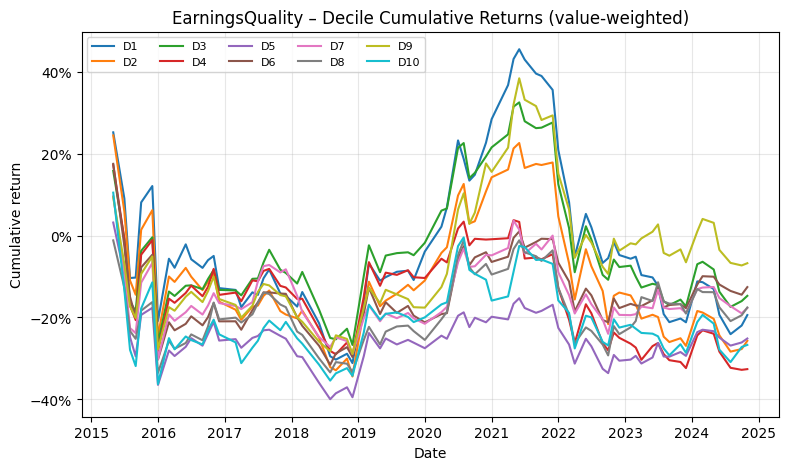

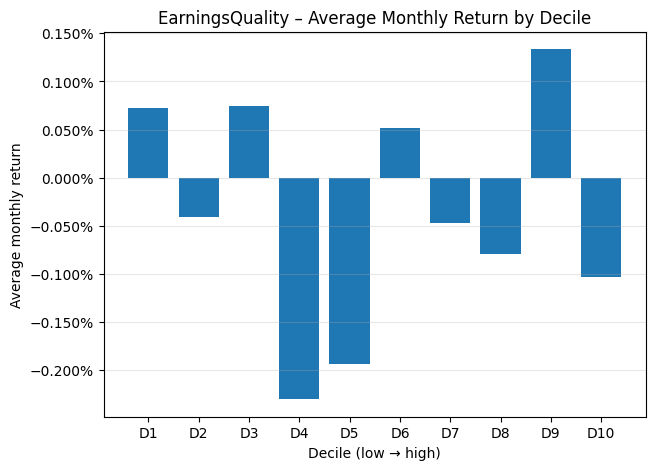

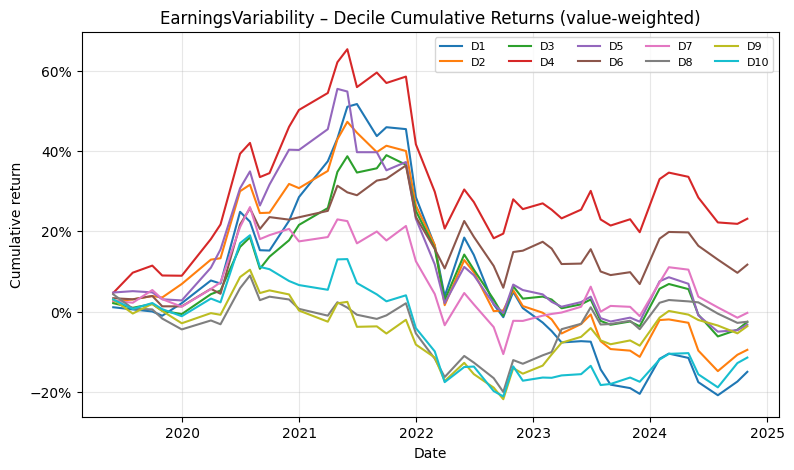

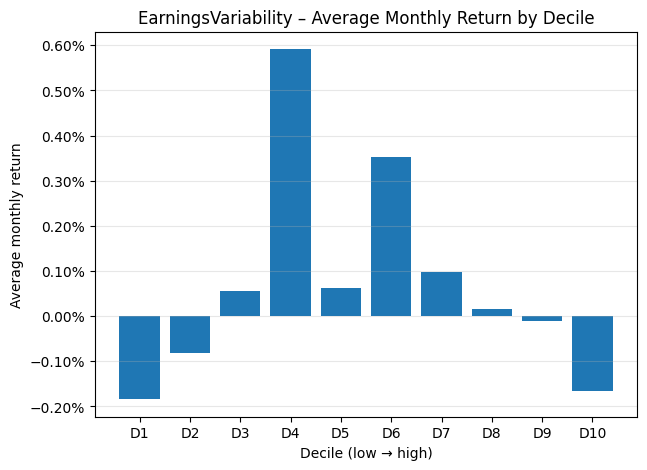

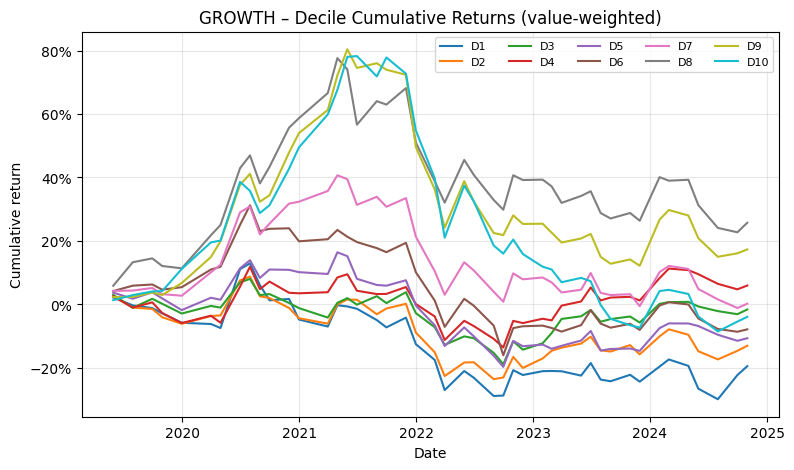

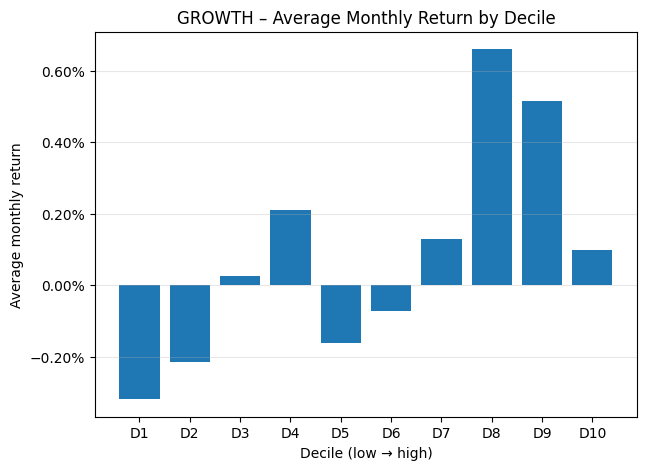

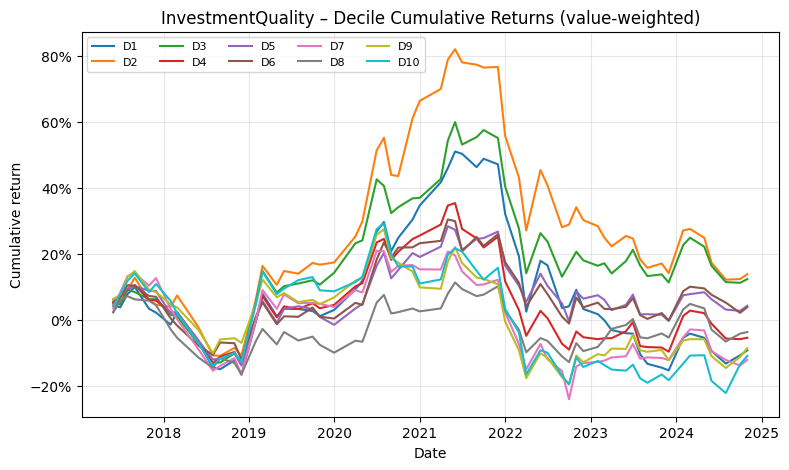

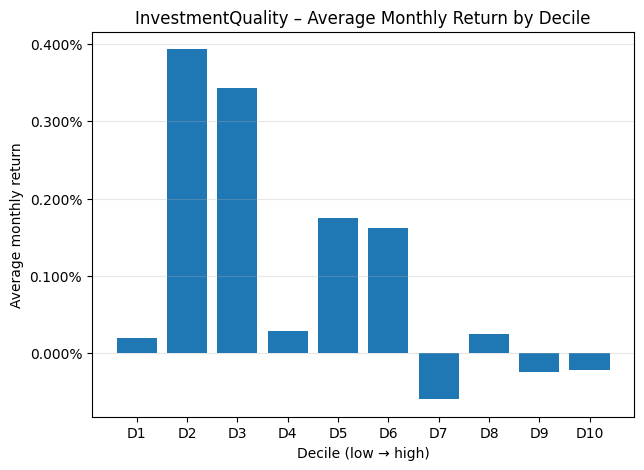

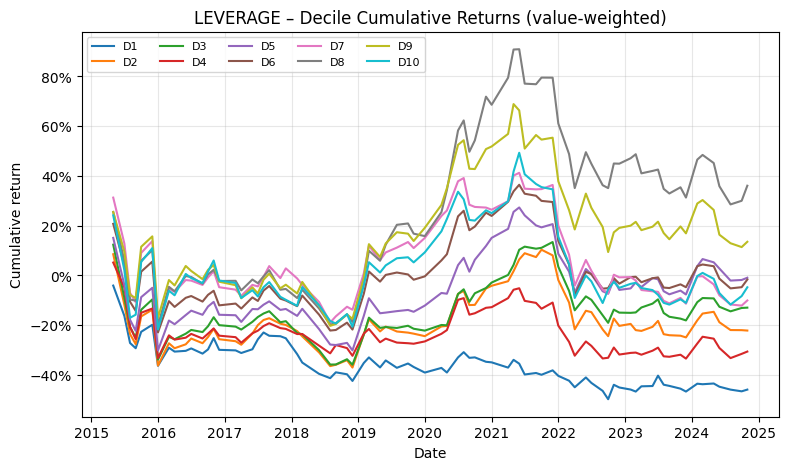

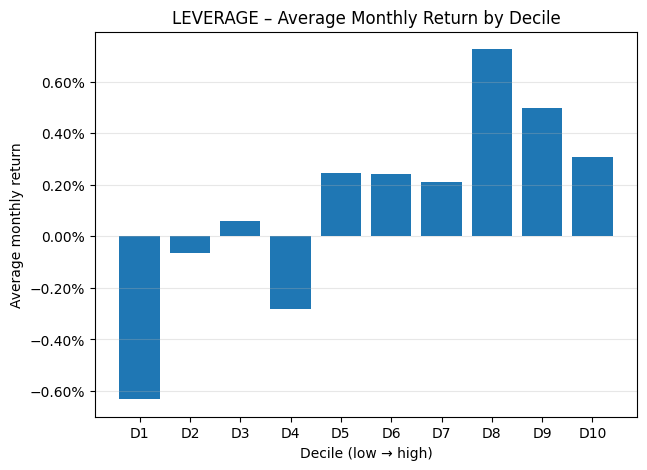

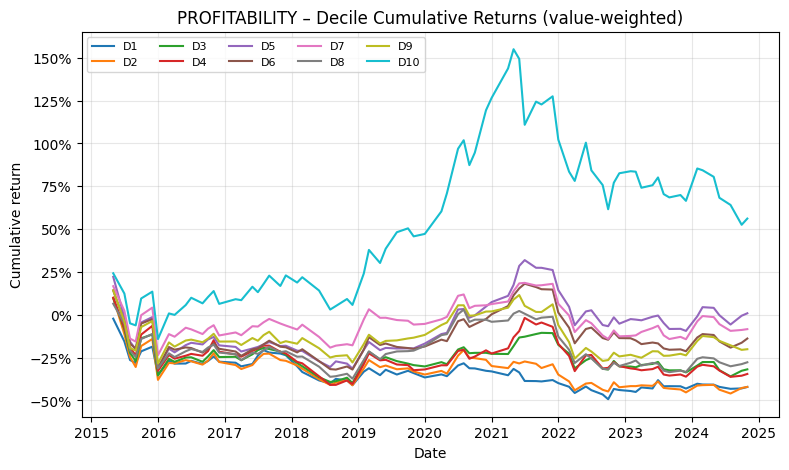

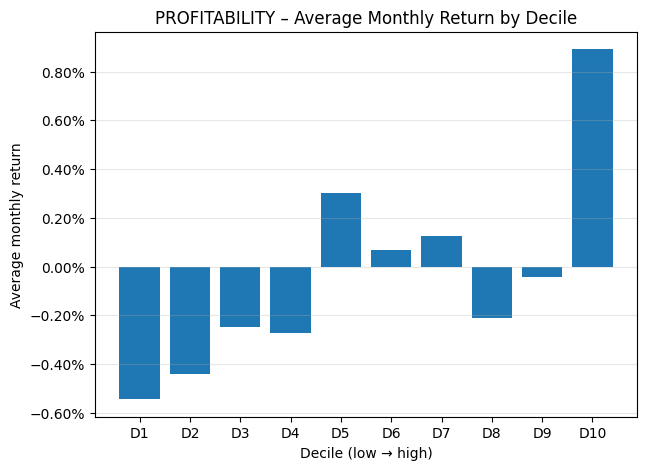

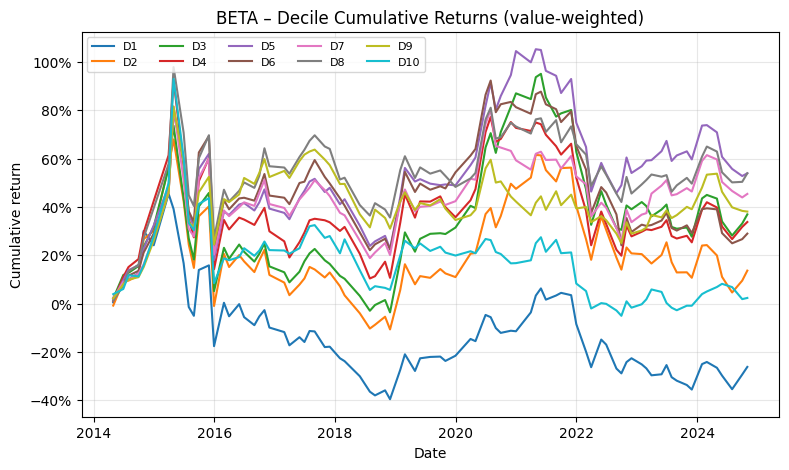

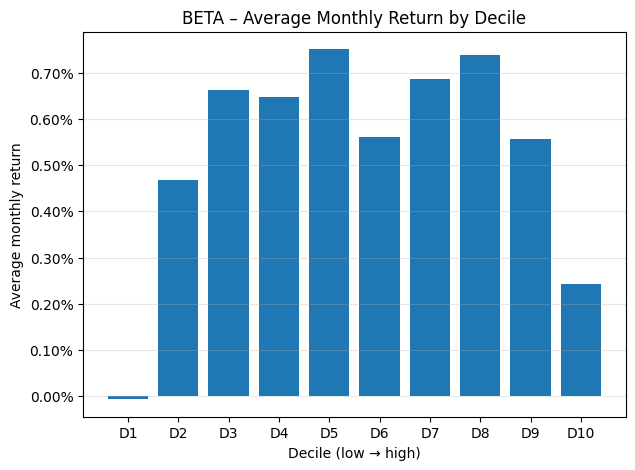

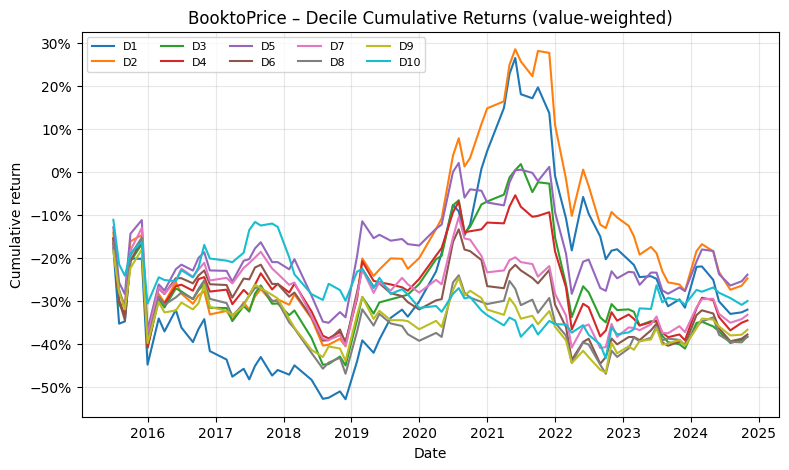

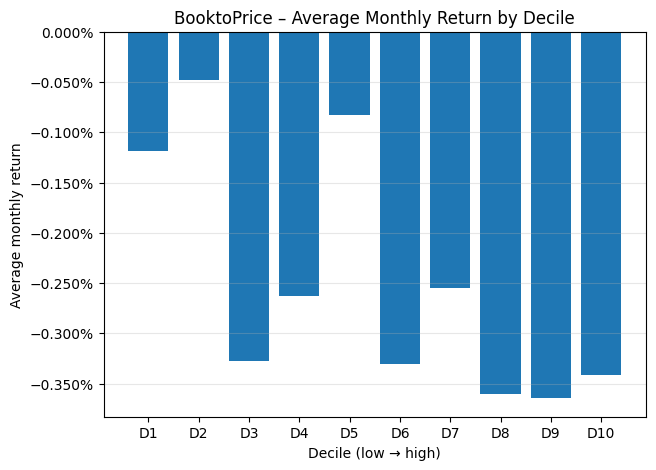

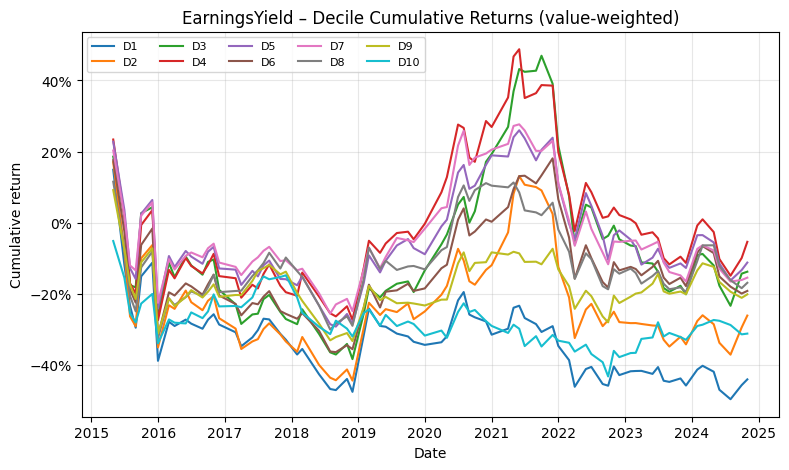

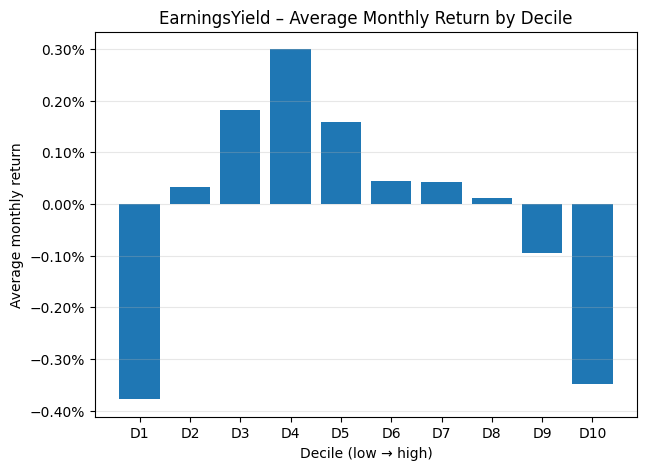

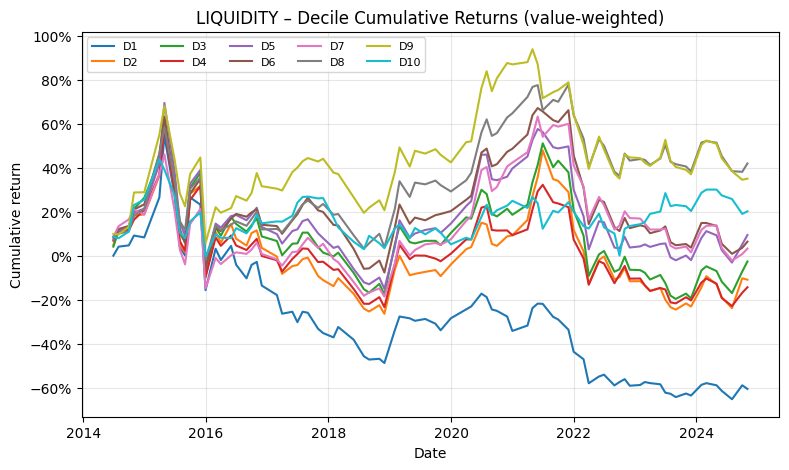

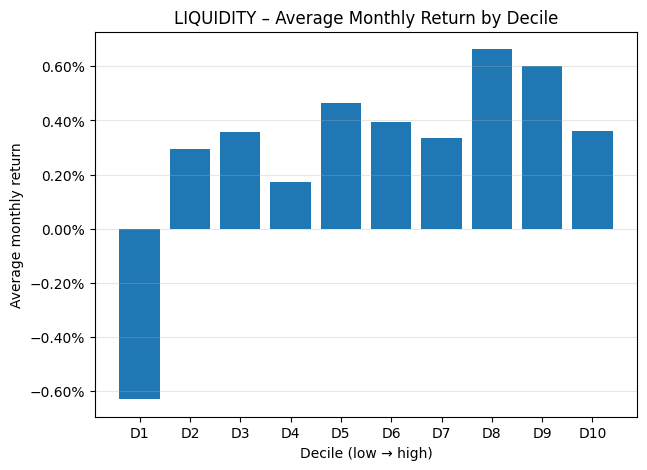

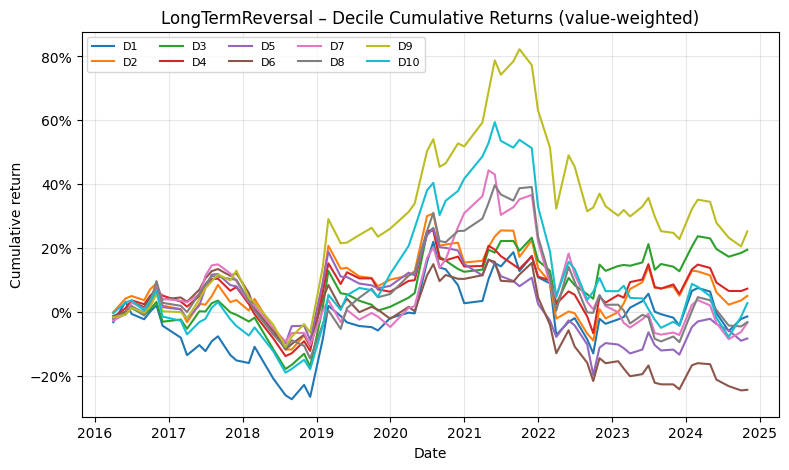

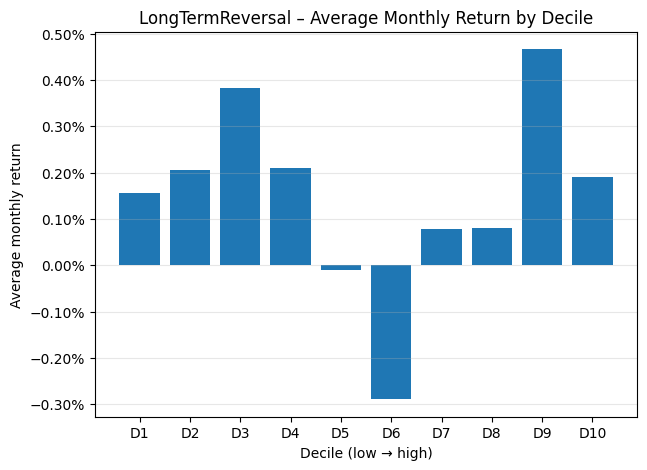

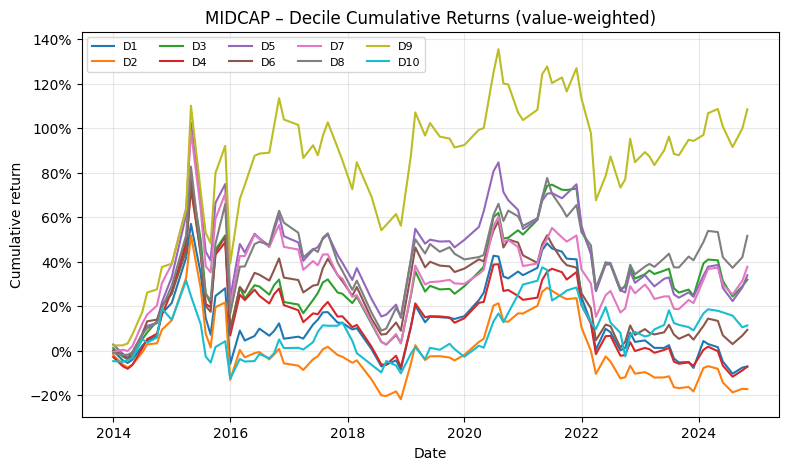

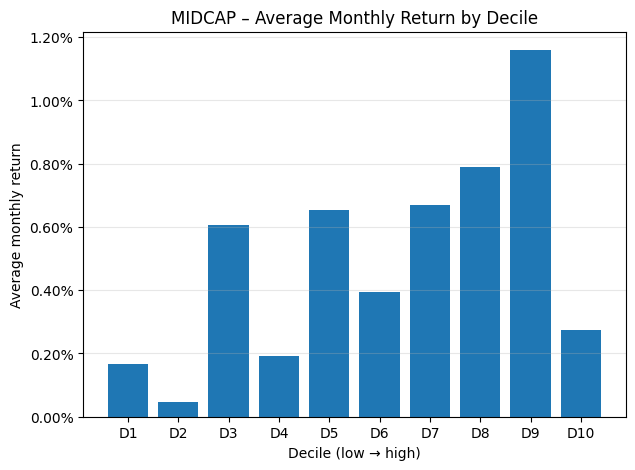

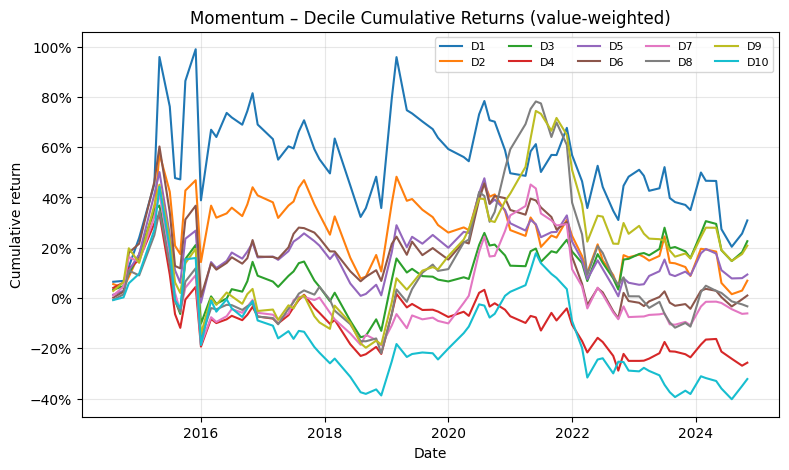

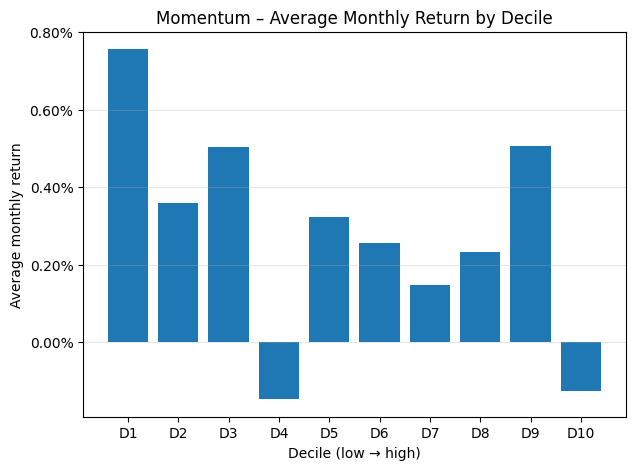

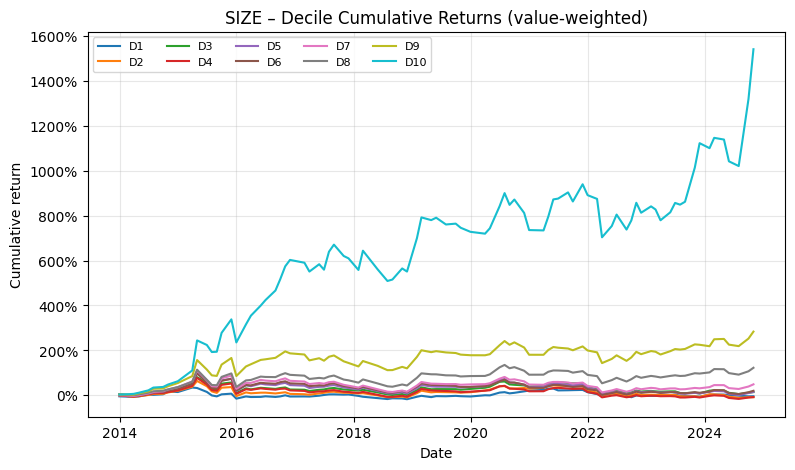

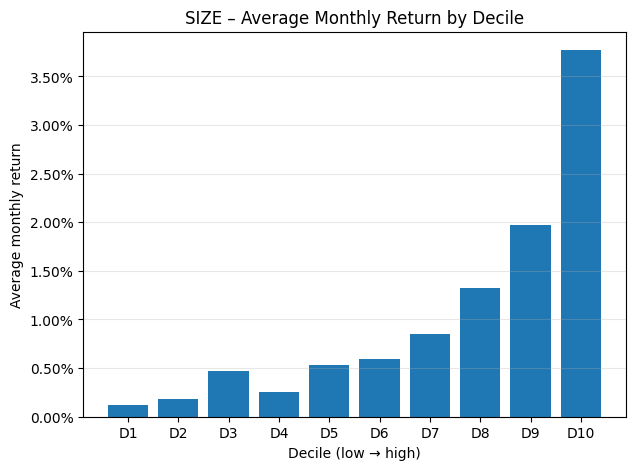

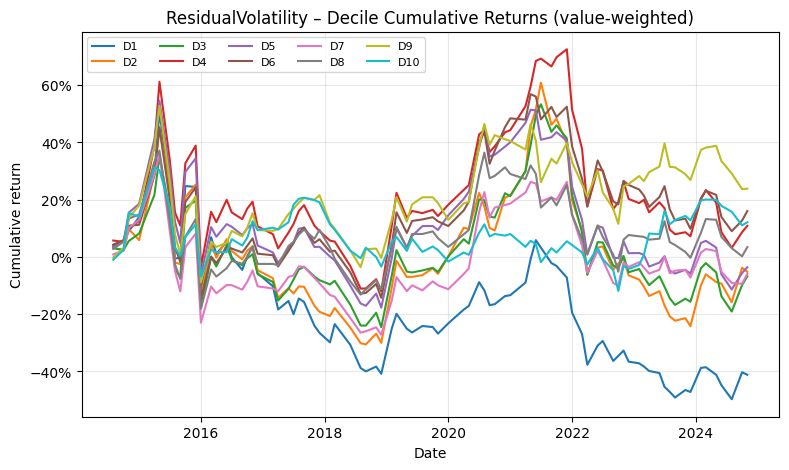

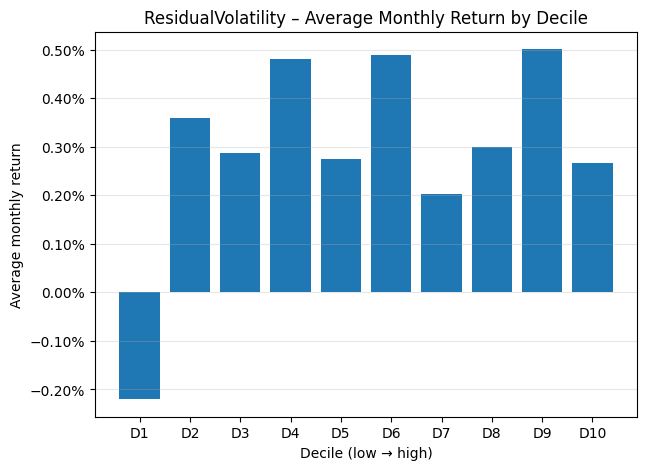

In [174]:
# === 0) 工具 ===
import numpy as np, pandas as pd, os
import matplotlib.pyplot as plt

def cols_to_6(df):
    df = df.copy()
    df.columns = df.columns.astype(str).str.extract(r'(\d{6})', expand=False)
    df = df.loc[:, df.columns.notna()]
    df = df.loc[:, ~df.columns.duplicated()]
    return df

def to_monthly(df, month_ends, lag_months=0):
    out = cols_to_6(df).sort_index()
    if isinstance(out.index, pd.PeriodIndex):
        out.index = out.index.to_timestamp('M')
    out = out.reindex(month_ends, method='ffill')
    if lag_months:
        out = out.shift(lag_months)
    return out

def perf_summary(ret_s):
    r = ret_s.dropna()
    if r.empty: 
        return pd.Series(dtype=float)
    mu, sd, n = r.mean(), r.std(ddof=1), len(r)
    return pd.Series({
        'AnnMean': 12*mu,
        'AnnVol' : np.sqrt(12)*sd,
        'Sharpe' : (12*mu)/(np.sqrt(12)*sd) if sd else np.nan,
        't'      : mu/(sd/np.sqrt(n)) if sd else np.nan,
        'HitRate': (r>0).mean(),
        'N'      : n
    })

def decile_backtest(factor_m, ret_fwd, mktcap_m=None, n_groups=10,
                    weighted='vw', by_industry=None, min_stocks=50):
    dates = factor_m.index.intersection(ret_fwd.index)
    dec_cols = [f'D{i}' for i in range(1, n_groups+1)]
    decile_ret = pd.DataFrame(index=dates, columns=dec_cols, dtype=float)

    for dt in dates:
        x = factor_m.loc[dt]
        r = ret_fwd.loc[dt]
        w0 = (mktcap_m.loc[dt] if (weighted=='vw' and mktcap_m is not None) else
              pd.Series(1.0, index=x.index))
        df = pd.concat({'x':x, 'r':r, 'w':w0}, axis=1).dropna()
        if len(df) < min_stocks:
            continue

        if by_industry is not None:
            ind = by_industry.reindex(df.index)
            df = df.assign(ind=ind)
            parts = []
            for _, sub in df.groupby('ind'):
                if len(sub) < n_groups: 
                    continue
                q = pd.qcut(sub['x'].rank(method='first'), q=n_groups,
                            labels=range(1, n_groups+1))
                sub = sub.assign(bucket=q.astype(int))
                parts.append(sub)
            if not parts:
                continue
            df = pd.concat(parts)
        else:
            q = pd.qcut(df['x'].rank(method='first'), q=n_groups,
                        labels=range(1, n_groups+1))
            df = df.assign(bucket=q.astype(int))

        for k in range(1, n_groups+1):
            g = df[df['bucket']==k]
            if g.empty:
                decile_ret.loc[dt, f'D{k}'] = np.nan
            else:
                if weighted=='vw':
                    w = g['w'].clip(lower=0).astype(float)
                    w = w/w.sum() if w.sum()>0 else np.ones(len(g))/len(g)
                    decile_ret.loc[dt, f'D{k}'] = float(np.dot(w, g['r']))
                else:
                    decile_ret.loc[dt, f'D{k}'] = float(g['r'].mean())

    ls_ret = pd.DataFrame({'D10-D1': decile_ret['D10'] - decile_ret['D1']}, index=decile_ret.index)
    return decile_ret, ls_ret, perf_summary(ls_ret['D10-D1'])

# === 1) 统一到月末、准备收益和权重 ===
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
merged['代码'] = merged['代码'].astype(str).str.slice(0, 6)

trade_days = pd.DatetimeIndex(merged['日期'].sort_values().drop_duplicates())
month_ends = trade_days.to_series().groupby(pd.Grouper(freq='ME')).tail(1).index

# 月度收益：用 t 月末暴露预测 t→t+1 收益
ret_m = (1 + merged.pivot(index='日期', columns='代码', values='Dretwd')
                  .sort_index()).resample('ME').apply(np.prod) - 1
ret_m.columns = ret_m.columns.astype(str).str.zfill(6)
ret_fwd = ret_m.shift(-1)

# 月末市值（市值加权口径用）
mktcap_m = (merged.sort_values('日期')
                 .groupby(['代码', pd.Grouper(key='日期', freq='ME')]).tail(1)
                 .pivot(index='日期', columns='代码', values='Dsmvtll')
                 .sort_index())
mktcap_m.columns = mktcap_m.columns.astype(str).str.zfill(6)

# 年报类因子建议整体滞后4个月（避免前视）
lag_map = {'EarningsQuality':4, 'EarningsVariability':4, 'GROWTH':4,
           'InvestmentQuality':4, 'LEVERAGE':4, 'PROFITABILITY':4, 'EarningsYield':4}

# 方向：把“应做空”的因子乘以 -1，确保“高组（D10）应更好”
sign_map = {
    'PROFITABILITY': +1, 'GROWTH': +1, 'EarningsYield': +1, 'BooktoPrice': +1,
    'EarningsQuality': +1, 'EarningsVariability': -1, 'SIZE': -1,
    'ResidualVolatility': -1, 'LIQUIDITY': -1, 'LEVERAGE': -1,
    'BETA': -1, 'Momentum': +1, 'LongTermReversal': -1, 'MIDCAP': +1,
    # 'InvestmentQuality' 看你的定义，通常 +1
}

# 若你有“股票→行业”的 Series（如 industry_lv1），用于行业内排序
try:
    industry_s = industry_lv1.copy()
    industry_s.index = industry_s.index.astype(str).str.slice(0,6)
except Exception:
    industry_s = None

# 统一成月度面板，并按 sign_map 调方向
factors_m = {}
for name, df in factors_any.items():
    fm = to_monthly(df, month_ends, lag_months=lag_map.get(name, 0))
    fm = fm.reindex(columns=mktcap_m.columns)
    fm = fm * sign_map.get(name, 1.0)
    factors_m[name] = fm

# === 2) 画图函数：累计曲线 + 月均收益柱状图 ===
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def plot_deciles_for_factor(name, fm, ret_fwd, mktcap_m,
                            by_industry=None, weighted='vw',
                            outdir=None, show=True):
    # 分组与绩效（沿用你之前的 decile_backtest）
    dec, ls, summ = decile_backtest(
        fm, ret_fwd, mktcap_m=mktcap_m, weighted=weighted,
        by_industry=by_industry, min_stocks=30
    )
    if dec.dropna(how='all').empty:
        print(f"[{name}] No valid decile data. Skipped.")
        return None

    # --- Figure 1: cumulative returns of deciles ---
    cum = (1 + dec).cumprod() - 1
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    for c in dec.columns:
        ax1.plot(cum.index, cum[c], label=c)
    ax1.set_title(f"{name} – Decile Cumulative Returns ({'value-weighted' if weighted=='vw' else 'equal-weighted'})")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Cumulative return")
    ax1.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax1.grid(True, alpha=0.3)
    ax1.legend(ncol=5, fontsize=8)

    # --- Figure 2: average monthly return by decile ---
    bar = dec.mean().reindex(dec.columns)  # D1..D10
    fig2, ax2 = plt.subplots(figsize=(7, 5))
    ax2.bar(bar.index, bar.values)
    ax2.set_title(f"{name} – Average Monthly Return by Decile")
    ax2.set_xlabel("Decile (low → high)")
    ax2.set_ylabel("Average monthly return")
    ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
    ax2.grid(True, axis='y', alpha=0.3)

    if outdir:
        os.makedirs(outdir, exist_ok=True)
        fig1.savefig(os.path.join(outdir, f"{name}_decile_cum.png"), dpi=150, bbox_inches='tight')
        fig2.savefig(os.path.join(outdir, f"{name}_decile_mean.png"), dpi=150, bbox_inches='tight')

    if not show:
        plt.close(fig1); plt.close(fig2)

    print(f"[{name}] Long–short (D10–D1) summary:\n{summ.round(3)}")
    return {'deciles': dec, 'ls': ls, 'summary': summ}

# === 3) 对所有因子批量生成两张图（行业内排序 + 市值加权） ===
all_results = {}
for name, fm in factors_m.items():
    res = plot_deciles_for_factor(
        name, fm, ret_fwd, mktcap_m,
        by_industry=industry_s,   # 若无行业信息，可改为 None
        weighted='vw',
        outdir="factor_decile_plots",  # 保存到本地目录；不要保存就设 None
        show=True
    )
    all_results[name] = res


# 股票协方差矩阵

In [185]:
import numpy as np
import pandas as pd

# ---------- EWMA 权重 ----------
def _ewma_weights(T, halflife):
    lam = 0.5 ** (1.0 / halflife)
    w = lam ** np.arange(T-1, -1, -1)
    return w / w.sum()

# ---------- 成对（pairwise）EWMA 因子协方差：避免因为个别缺失把整窗丢空 ----------
def ewma_factor_cov_pairwise(F: pd.DataFrame, halflife=12, min_T=6) -> pd.DataFrame:
    cols = [c for c in F.columns if F[c].notna().sum() >= min_T]
    F = F[cols]
    K = len(cols)
    S = np.zeros((K, K))
    for i in range(K):
        xi = F.iloc[:, i]
        for j in range(i, K):
            xj = F.iloc[:, j]
            df = pd.concat([xi, xj], axis=1, keys=['i','j']).dropna()
            T = len(df)
            if T < min_T:
                S[i, j] = S[j, i] = 0.0
                continue
            w = _ewma_weights(T, halflife)
            mi = (w * df['i'].values).sum()
            mj = (w * df['j'].values).sum()
            cov = ((df['i'].values - mi) * (df['j'].values - mj) * w).sum()
            S[i, j] = S[j, i] = cov
    Sigma = pd.DataFrame(S, index=cols, columns=cols)
    # 极小岭收缩，避免数值不稳
    diag_med = np.median(np.diag(Sigma))
    ridge = max(1e-12, (0 if np.isnan(diag_med) else diag_med) * 1e-6)
    return Sigma + np.eye(len(cols)) * ridge

# ---------- EWMA 特质方差（简化为对角）：不足样本用截面中位数填补 ----------
def ewma_specific_var_fill(E: pd.DataFrame, halflife=12, min_T=6) -> pd.Series:
    out = {}
    for c in E.columns:
        s = E[c].dropna()
        if len(s) >= min_T:
            w = _ewma_weights(len(s), halflife)
            mu = (w * s.values).sum()
            out[c] = float(((s.values - mu) ** 2 * w).sum())
        else:
            out[c] = np.nan
    spec = pd.Series(out)
    med = spec.median(skipna=True)
    spec = spec.fillna(med if np.isfinite(med) else 0.0)
    eps  = max(1e-12, spec.median() * 1e-6)
    return spec.clip(lower=eps)

# ---------- 构造 Σ_F、Σ_S、Σ，并计算组合波动 ----------
def build_asset_covariance(factor_ret_m: pd.DataFrame,
                           resid_m: pd.DataFrame,
                           X_t: pd.DataFrame,      # N×K 暴露（行=股票，列=因子）
                           t=None, window=36, halflife_F=12, halflife_S=12):
    if t is None:
        t = factor_ret_m.index[-1]
    F_win = factor_ret_m.loc[:t].tail(window)
    E_win = resid_m.loc[:t].tail(window)

    # 1) Σ_F（K×K）
    Sigma_F = ewma_factor_cov_pairwise(F_win, halflife=halflife_F, min_T=6)

    # 2) Σ_S（N×N，对角）
    spec_var = ewma_specific_var_fill(E_win, halflife=halflife_S, min_T=6)

    # 3) 统一股票/因子集合并构造 Σ
    X = X_t.dropna(how='any').copy()
    facs  = X.columns.intersection(Sigma_F.index)
    X     = X[facs]
    Sigma_F = Sigma_F.loc[facs, facs]

    codes = X.index.intersection(spec_var.index)
    X = X.loc[codes]
    spec_var = spec_var.loc[codes]

    Sigma_S = pd.DataFrame(np.diag(spec_var.values), index=codes, columns=codes)  # 对角矩阵
    Sigma   = X.values @ Sigma_F.values @ X.values.T + Sigma_S.values
    Sigma   = pd.DataFrame(Sigma, index=codes, columns=codes)

    return Sigma_F, Sigma_S, Sigma

def portfolio_vol_from_cov(Sigma: pd.DataFrame, weights: pd.Series, annualize: float | None = None) -> float:
    codes = Sigma.index.intersection(weights.index)
    if len(codes) == 0: return np.nan
    w = weights.reindex(codes).astype(float).fillna(0.0).values
    # 归一化（可按需去掉）
    if w.sum() != 0:
        w = w / w.sum()
    S = Sigma.loc[codes, codes].values
    if annualize is not None:
        S = S * annualize
    var = np.dot(w, S @ w)
    return float(np.sqrt(var).item())


In [186]:
# t = 评估月份（不传则默认最后一个月）
t = factor_ret_m.index[-1]
# X_t = 当月的 N×K 暴露矩阵（列顺序最好与 factor_ret_m.columns 一致）
X_t = pd.concat([factors_m[k].loc[t].rename(k) for k in factor_ret_m.columns], axis=1)

Sigma_F_t, Sigma_S_t, Sigma_t = build_asset_covariance(
    factor_ret_m, resid_m, X_t, t=t, window=36, halflife_F=12, halflife_S=12
)

# 现在你就“看得到”矩阵了：
print("Sigma_F (factor covariance) shape:", Sigma_F_t.shape)
print(Sigma_F_t.head())          # 因子×因子
print("Sigma_S (specific, diagonal) shape:", Sigma_S_t.shape)
print(Sigma_S_t.values.diagonal()[:5])  # 前几个特质方差
print("Sigma (asset covariance) shape:", Sigma_t.shape)

# 组合波动率：传入你自己组合的权重 w_t（索引=股票）
# 例：等权
w_t = pd.Series(1.0/len(Sigma_t), index=Sigma_t.index)
sigma_p = portfolio_vol_from_cov(Sigma_t, w_t, annualize=12)   # 月频年化
print("Annualized portfolio volatility:", sigma_p)


Sigma_F (factor covariance) shape: (15, 15)
                     EarningsQuality  EarningsVariability    GROWTH  \
EarningsQuality             0.000110             0.000003 -0.000028   
EarningsVariability         0.000003             0.000023 -0.000016   
GROWTH                     -0.000028            -0.000016  0.000050   
InvestmentQuality           0.000009             0.000002 -0.000009   
LEVERAGE                    0.000008             0.000023 -0.000027   

                     InvestmentQuality  LEVERAGE  PROFITABILITY      BETA  \
EarningsQuality               0.000009  0.000008      -0.000063  0.000168   
EarningsVariability           0.000002  0.000023       0.000021  0.000040   
GROWTH                       -0.000009 -0.000027      -0.000018 -0.000091   
InvestmentQuality             0.000011  0.000006      -0.000017  0.000019   
LEVERAGE                      0.000006  0.000064       0.000038  0.000083   

                     BooktoPrice  EarningsYield  LIQUIDITY  LongTe

In [187]:
Sigma_F_t

,EarningsQuality,EarningsVariability,GROWTH,InvestmentQuality,LEVERAGE,PROFITABILITY,BETA,BooktoPrice,EarningsYield,LIQUIDITY,LongTermReversal,MIDCAP,Momentum,SIZE,ResidualVolatility
EarningsQuality,0.000110,0.000003,-0.000028,0.000009,0.000008,-0.000063,0.000168,-0.000023,-0.000035,0.000124,-0.000109,-0.000031,-0.000157,0.000089,-0.000192
EarningsVariability,0.000003,0.000023,-0.000016,0.000002,0.000023,0.000021,0.000040,0.000021,-0.000012,-0.000019,-0.000019,0.000013,-0.000026,-0.000029,-0.000058
GROWTH,-0.000028,-0.000016,0.000050,-0.000009,-0.000027,-0.000018,-0.000091,-0.000027,0.000024,-0.000015,0.000019,-0.000013,0.000037,-0.000002,0.000107
InvestmentQuality,0.000009,0.000002,-0.000009,0.000011,0.000006,-0.000017,0.000019,-0.000006,0.000002,0.000024,0.000008,0.000002,0.000008,0.000007,-0.000004
LEVERAGE,0.000008,0.000023,-0.000027,0.000006,0.000064,0.000038,0.000083,0.000026,-0.000012,-0.000056,0.000005,0.000017,-0.000002,-0.000046,-0.000041
PROFITABILITY,-0.000063,0.000021,-0.000018,-0.000017,0.000038,0.000291,-0.000119,0.000124,-0.000042,-0.000292,0.000052,0.000022,0.000119,-0.000089,0.000075
BETA,0.000168,0.000040,-0.000091,0.000019,0.000083,-0.000119,0.000807,-0.000074,-0.000114,0.000162,-0.000201,-0.000066,-0.000298,0.000230,-0.000466
BooktoPrice,-0.000023,0.000021,-0.000027,-0.000006,0.000026,0.000124,-0.000074,0.000134,-0.000019,-0.000121,0.000029,0.000028,0.000046,-0.000096,0.000002
EarningsYield,-0.000035,-0.000012,0.000024,0.000002,-0.000012,-0.000042,-0.000114,-0.000019,0.000065,0.000024,0.000024,0.000005,0.000018,-0.000014,0.000099
LIQUIDITY,0.000124,-0.000019,-0.000015,0.000024,-0.000056,-0.000292,0.000162,-0.000121,0.000024,0.000480,-0.000122,-0.000050,-0.000247,0.000243,-0.000222


In [188]:
Sigma_S_t

,000001,000002,000006,000007,000008,000009,000011,000012,000016,000017,...,920924,920925,920932,920943,920946,920961,920964,920970,920981,920985
000001,0.002959,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000
000002,0.000000,0.006705,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000
000006,0.000000,0.000000,0.038417,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000
000007,0.000000,0.000000,0.000000,0.013951,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000
000008,0.000000,0.000000,0.000000,0.000000,0.00407,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920961,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.06695,0.00000,0.000000,0.000000,0.000000
920964,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.44482,0.000000,0.000000,0.000000
920970,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.009475,0.000000,0.000000
920981,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,0.121083,0.000000


In [189]:
sigma_p

0.026030321723341448

Correlation (daily): 0.7860364725743942


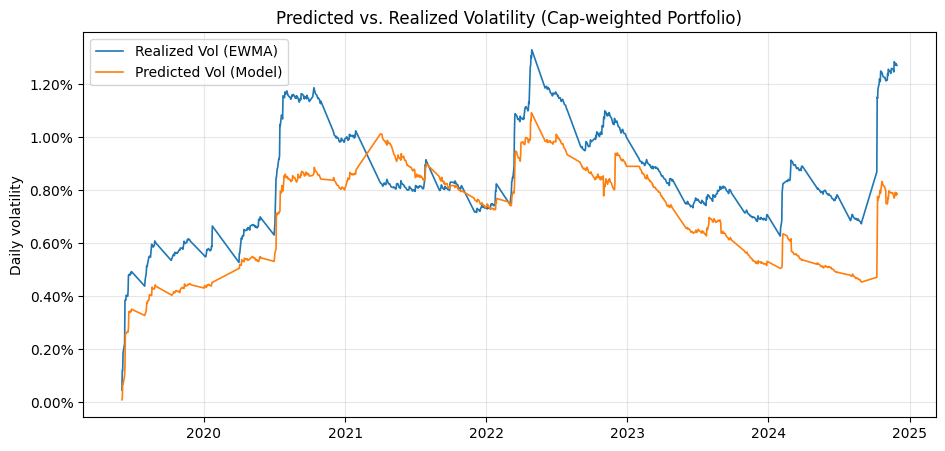

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ------------------ 0) 基础数据：日收益、日市值、日历 ------------------
merged = merged.copy()
merged['日期'] = pd.to_datetime(merged['日期'])
merged['代码'] = merged['代码'].astype(str).str.slice(0, 6)

# 日收益 r_{t,i} 和 日末总市值 MV_{t,i}
ret_d    = merged.pivot(index='日期', columns='代码', values='Dretwd').sort_index()
mktcap_d = merged.pivot(index='日期', columns='代码', values='Dsmvtll').sort_index()
ret_d.columns    = ret_d.columns.astype(str).str.zfill(6)
mktcap_d.columns = mktcap_d.columns.astype(str).str.zfill(6)

dates = ret_d.index

# ------------------ 1) 因子暴露：月频 → 日频（ffill & shift(1)） ------------------
# 只选用你想进入回归的因子顺序（建议与月度回归一致）
factor_names = list(factors_m.keys())  # 或者手工列个顺序
fac_d = {}
for name in factor_names:
    dfm = factors_m[name]
    # 月末 → 日历前向填充，再 shift(1) 防止当天用到当月末新值
    fac_d[name] = dfm.reindex(dates, method='ffill').shift(1).reindex(columns=ret_d.columns)

# 若要加入“行业因子”，请准备好日频行业 one-hot（列=各行业，行=股票；每日相同）并做加权去均值后 concat 进 X_t

# ------------------ 2) 递推 EWMA 的设置 ------------------
# 日频半衰期（可与研报一致选 63），也可调整；窗口仅用于暖启动
hl_F = 63     # 因子协方差半衰期（天）
hl_S = 63     # 特质方差半衰期（天）
lamF = 0.5 ** (1.0 / hl_F)
lamS = 0.5 ** (1.0 / hl_S)
ridge = 1e-10   # 极小岭收缩

K = len(factor_names)
muF  = np.zeros(K)                   # 因子收益 EWMA 均值
SF   = np.eye(K) * ridge             # 因子协方差 EWMA（初始化很小的对角）

spec_var = pd.Series(1e-6, index=ret_d.columns)  # 特质方差 EWMA（股票维度）

# ------------------ 3) 逐日回归 → 更新 Σ_F、Σ_S → 计算 σ_pred 与 σ_real ------------------
# ……前置代码同你现在的一样……

pred_sigma = pd.Series(index=dates, dtype=float)
real_sigma = pd.Series(index=dates, dtype=float)
var_real   = 0.0
lamR = lamS   # 真实波动率也用相同半衰期

for dt in dates:
    # 1) 取当日可用的数据 & 暴露（已是shift(1)后的因子）
    X_parts = [fac_d[name].loc[dt].rename(name) for name in factor_names]
    X_t = pd.concat(X_parts, axis=1).dropna(how='any')       # N×K
    r_t = ret_d.loc[dt].reindex(X_t.index).dropna()          # N
    mv_t = mktcap_d.loc[dt].reindex(X_t.index)               # N
    wcap = np.sqrt(mv_t.clip(lower=0)).fillna(0.0)           # √MV（回归权重）
    # 组合权重（昨日市值占比）
    w_prev = mktcap_d.shift(1).loc[dt].reindex(X_t.index).fillna(0.0)
    if w_prev.sum() > 0:
        w_prev = w_prev / w_prev.sum()

    # 共同可用股票
    common = r_t.index.intersection(wcap.index).intersection(w_prev.index)
    X_t = X_t.loc[common]; r_t = r_t.loc[common]; wcap = wcap.loc[common]; w_prev = w_prev.loc[common]
    if len(common) <= X_t.shape[1] + 10 or (wcap <= 0).all():
        pred_sigma.loc[dt] = np.nan
        # 真实组合：同一子集 & 同一权重口径
        rp = float((w_prev * r_t).sum())
        var_real = lamR * var_real + (1 - lamR) * (rp ** 2)
        real_sigma.loc[dt] = np.sqrt(var_real)
        continue

    # === A) 先算“预测波动率”（用 t−1 的 Σ_F / Σ_S；对子集权重**重新归一**）===
    # 子集权重归一
    w_sub = w_prev / (w_prev.sum() if w_prev.sum() != 0 else 1.0)
    # 因子集合交集
    facs = X_t.columns.intersection(SF.shape[0] and factor_names)  # 如果 SF 是 DataFrame 就用索引交集
    X_pred = X_t[facs]
    D = np.diag(spec_var.reindex(common).values)   # Σ_S(t−1) 的对角
    Sigma_t_minus = X_pred.values @ SF @ X_pred.values.T + D
    pred_sigma.loc[dt] = np.sqrt(np.dot(w_sub.values, Sigma_t_minus @ w_sub.values))

    # === B) 再做横截面 WLS，更新到 t 时刻的 Σ_F / Σ_S（用来预测 t+1）===
    sw = np.sqrt(wcap.values)
    WX = X_t.values * sw[:, None]
    Wr = r_t.values * sw
    beta_t = np.linalg.lstsq(WX, Wr, rcond=None)[0]            # K
    res_t  = r_t.values - X_t.values @ beta_t                  # N

    # 更新 Σ_F（均值+协方差的EWMA递推）
    muF  = lamF * muF + (1 - lamF) * beta_t
    SF   = lamF * SF  + (1 - lamF) * np.outer(beta_t - muF, beta_t - muF)
    SF  += np.eye(len(muF)) * 1e-10

    # 更新 Σ_S 对角
    e2 = pd.Series(res_t ** 2, index=common)
    spec_var.loc[common] = lamS * spec_var.loc[common] + (1 - lamS) * e2
    spec_var = spec_var.fillna(spec_var.median()).clip(lower=1e-12)

    # === C) 真实波动率（同一子集 & 同一权重）===
    rp = float((w_sub * r_t).sum())
    var_real = lamR * var_real + (1 - lamR) * (rp ** 2)
    real_sigma.loc[dt] = np.sqrt(var_real)


# 去掉起始暖启动阶段的 NaN
pred_sigma = pred_sigma.dropna()
real_sigma = real_sigma.reindex(pred_sigma.index).dropna()
common_idx = pred_sigma.index.intersection(real_sigma.index)
pred_sigma = pred_sigma.loc[common_idx]
real_sigma = real_sigma.loc[common_idx]

# 年化（可选）：日波动率*sqrt(252)
pred_ann = pred_sigma * np.sqrt(252)
real_ann = real_sigma * np.sqrt(252)

# 相关系数
rho = pred_sigma.corr(real_sigma)
print("Correlation (daily):", rho)

# ------------------ 4) 画图（与研报类似的两条曲线） ------------------
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(real_sigma.index, real_sigma, label='Realized Vol (EWMA)', linewidth=1.2)
ax.plot(pred_sigma.index, pred_sigma, label='Predicted Vol (Model)', linewidth=1.2)
ax.set_title('Predicted vs. Realized Volatility (Cap-weighted Portfolio)')
ax.set_ylabel('Daily volatility')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()

# 如果你要“月度”展示：对上述日波动率取月均或月末值
# monthly = pd.concat({'pred': pred_sigma, 'real': real_sigma}, axis=1).resample('M').last()
# display(monthly.tail())


Correlation : 0.7860364725743942


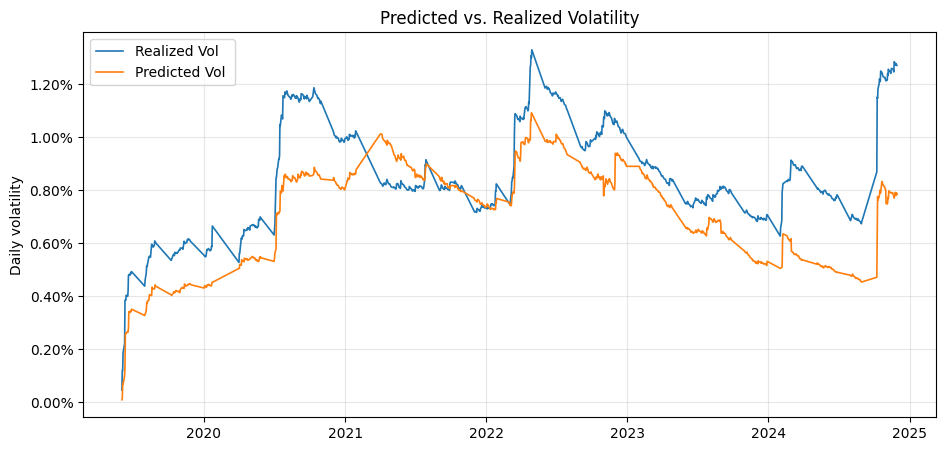

In [193]:
print("Correlation :", rho)
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(real_sigma.index, real_sigma, label='Realized Vol ', linewidth=1.2)
ax.plot(pred_sigma.index, pred_sigma, label='Predicted Vol ', linewidth=1.2)
ax.set_title('Predicted vs. Realized Volatility')
ax.set_ylabel('Daily volatility')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()
